# 1. BACKGROUND #

**CUSTOMER FINANCIAL TRANSACTIONS**

~This task is based on synthesised trasaction dataset, containing 3 months worth of transactions for 100 hypothetical customers

~It contains purchases, recurring transactions & salary transactions

~The dataset is designed to simulate realistic transaction bahaviours that are observed in the read transaction data

**DATA TASKS**

**TASK I: EXPLORATORY DATA ANALYSIS**

~Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers

~The dataset gives enough information to provide some kind of recommendation for various groups of customers

~The focus in this case is to try to build a model that will enable me to predict annual salary

~For this I'll have to do a thorough EDA & create additional features, in addition to what is available

**TASK II: ANNUAL SALARY PREDICTION**

~Using the same transaction dataset, identify the annual salary for each customer

~Explore correlations between annual salary and various customer attributes (eg. ages)
     
     -These attributes could be those that are readily available in the data or those constructed or derived (eg. relating to purchasing behaviour)

~Visualise any interesting correlations

~Build a simple regression model to predict the annual salary for each customer using the attributes identified above

~How accurate is the model? Should it be used to segment customers (for whom it does not have this data) into brackets for reporting purposes?

~Build a decision tree based model to predict salary, does it perform better? How would one accurately test the performance of this model?

###  NOTEBOOK AIM ###

In this notebook:

~I will focus on the main task at hand; generating the target variable for the problem & create a model that will be able to predict the annual income of customers

~A comprehensive EDA will follow, in which I will do a simple segmentation of customers & make some recommendations based on my findings in the investigation

~Feature engineering will be an important part of this notebook, I'll continuously try to find features that will improve the model as I will be utilising an agile methodology

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns; sns.set(style='whitegrid')
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
import warnings; warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/EmmalisaAmber/Downloads/anz/anz.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.T.sort_index().T.columns

Index(['account', 'age', 'amount', 'balance', 'bpay_biller_code',
       'card_present_flag', 'country', 'currency', 'customer_id', 'date',
       'extraction', 'first_name', 'gender', 'long_lat', 'merchant_code',
       'merchant_id', 'merchant_long_lat', 'merchant_state', 'merchant_suburb',
       'movement', 'status', 'transaction_id', 'txn_description'],
      dtype='object')

### **FEATURE DATATYPES** ###

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

Some of the data types can be changed, eg. date & extraction to datetime to make it possible to extract some data from these features

### **DATAFRAME ADJUSTMENTS** ###

Very early on it's noticable that some things that can be done with the dataset:

~Split **merchant_long_lat** into two columns, this will make it possible to visualise the data, same goes for **long_lat**

~Convert columns that contain time data from object type to datetime64; extracting more data from this feature

~Create an **age group feature**, **bin_age**, which could have some relevance for both tasks

In [5]:
# Merchant Location
ldf = df['merchant_long_lat'].str.split(' ',expand=True)
ldf.columns = ['merchant_longitude', 'merchant_latitude']
ldf=ldf.astype('float64')
df = df.drop('merchant_long_lat', axis=1)

# Some coordinates
ldf_gps = df['long_lat'].str.split(' ', expand=True)
ldf_gps=ldf_gps.astype('float64')
ldf_gps.columns = ['longitude', 'latitude']
df= df.drop('long_lat', axis=1)

df= pd.concat([df,ldf,ldf_gps], axis=1)
df.sort_index(axis=1, inplace=True)

# Ensure the columns are datetime with timezone
df['extraction'] = pd.to_datetime(df['extraction'], utc=True)
df['date'] = pd.to_datetime(df['date'], utc=True)

#Convert dtype to datetime64
#extraction time is always after data

df['extraction']=df['extraction'].dt.tz_localize(None).astype('datetime64[ns]')
df['date']= df['date'].dt.tz_localize(None).astype('datetime64[ns]')

#Add simple age category feature
df['bin_age']=pd.cut(df.age,[0,20,30,40,50,60,70,200],
                    labels=['<20','20-30','30-40','40-50','50-60','60-70','70>'])

I will be utilising the extraction time for generating time features:

~Two features, extraction & date are time based features; can extract some useful features from them (eg. day of the week)

~Notice that extraction time occurs after date, there shouldn't be a big difference between the two 

In [6]:
#Extract time based data
year= df.extraction.dt.year        #year
month=df.extraction.dt.month       #month
day=df.extraction.dt.day           #day
dow=df.extraction.dt.dayofweek     #day of the week
hour=df.extraction.dt.hour         #hour 
minute=df.extraction.dt.minute     #minute

#Store time features in df_time
df_time =pd.concat([year,month,day,hour,minute,dow],axis=1)
df_time.columns=['year','month','day','hour','minute','dow']
df=pd.concat([df,df_time],axis=1)

#Dictionary used to map umeric to categorical
dict_map ={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

#Convert numbers to string represetations for better interpretability
df['dow']=df['extraction'].dt.dayofweek.map(dict_map)
df=df.drop(['extraction'],axis=1)

### **DATASET STATISTICS** ###

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   account             12043 non-null  object        
 1   age                 12043 non-null  int64         
 2   amount              12043 non-null  float64       
 3   balance             12043 non-null  float64       
 4   bpay_biller_code    885 non-null    object        
 5   card_present_flag   7717 non-null   float64       
 6   country             12043 non-null  object        
 7   currency            12043 non-null  object        
 8   customer_id         12043 non-null  object        
 9   date                12043 non-null  datetime64[ns]
 10  first_name          12043 non-null  object        
 11  gender              12043 non-null  object        
 12  latitude            12043 non-null  float64       
 13  longitude           12043 non-null  float64   

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,12043.0,30.58233,18.0,22.0,28.0,38.0,78.0,10.046343
amount,12043.0,187.933588,0.1,16.0,29.0,53.655,8835.98,592.599934
balance,12043.0,14704.195553,0.24,3158.585,6432.01,12465.945,267128.52,31503.722652
card_present_flag,7717.0,0.802644,0.0,1.0,1.0,1.0,1.0,0.398029
date,12043,2018-09-15 21:27:39.951839232,2018-08-01 00:00:00,2018-08-24 00:00:00,2018-09-16 00:00:00,2018-10-09 00:00:00,2018-10-31 00:00:00,NaN
latitude,12043.0,-38.164347,-573.0,-37.7,-33.89,-30.75,-12.37,54.622791
longitude,12043.0,143.648563,114.62,138.69,145.23,151.22,255.0,16.669352
merchant_code,883.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
merchant_latitude,7717.0,-32.752651,-43.31,-37.71,-33.84,-29.44,-12.33,5.282423
merchant_longitude,7717.0,143.433277,113.83,144.68,145.83,151.21,153.61,12.090074


### **FEATURE INSPECTION** ###

**MISSING DATA**

~Features **bpay_biller_code** & **merchant_code** have quite a lot of missing data -bpay_biller_code are for salary payments; redacted to a value of 0. 

In [9]:
df=df.drop(columns=['bpay_biller_code','merchant_code'])

**DROP UNINFORMATIVE COLUMNS**

Let's start with features that don't differ country and currency

~All transactions are made in Australia and are in AUD (ie. only domestic transactions are included)

~Geographically transactions can in different states of Australia

In [10]:
display(df['country'].value_counts())
display(df['currency'].value_counts())
df=df.drop(columns=['country','currency'])

country
Australia    12043
Name: count, dtype: int64

currency
AUD    12043
Name: count, dtype: int64

**PREPARE DATA FOR DOWNSTREAM TASKS**

~Let's prepare data for the exploratory data analysis, where we will explore debit payments df_deb

~For annual salary deduction, we will be utilising txn_description, storing the subset in salary

In [11]:
# Debit Transactions
df_deb= df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit= df[df.movement=='credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [12]:
salary =txn['PAY/SALARY']

In [13]:
salary

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow
50,ACC-588564840,23,3903.95,8342.11,NaN,CUS-1462656821,2018-08-01,Isaiah,M,-33.76,...,posted,9ca281650e5d482d9e53f85e959baa66,PAY/SALARY,20-30,2018,8,1,11,0,Wednesday
61,ACC-1650504218,23,1626.48,2040.58,NaN,CUS-2500783281,2018-08-01,Marissa,F,-37.93,...,posted,1822eb0e1bbe4c9e95ebbb0fa2cc4323,PAY/SALARY,20-30,2018,8,1,12,0,Wednesday
64,ACC-3326339947,22,983.36,3158.51,NaN,CUS-326006476,2018-08-01,Eric,M,-33.80,...,posted,bd62b1799a454cedbbb56364f7c40cbf,PAY/SALARY,20-30,2018,8,1,12,0,Wednesday
68,ACC-3541460373,24,1408.08,2517.66,NaN,CUS-1433879684,2018-08-01,Jeffrey,M,-37.83,...,posted,0d95c7c932bb48e5b44c2637bdd3efe9,PAY/SALARY,20-30,2018,8,1,13,0,Wednesday
70,ACC-2776252858,43,1068.04,2271.79,NaN,CUS-4123612273,2018-08-01,Kristin,F,-37.76,...,posted,f50ccf1195214d14a0acbfcb5a265193,PAY/SALARY,40-50,2018,8,1,13,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,ACC-1973887809,26,1098.91,9378.51,NaN,CUS-1646621553,2018-10-31,Antonio,M,-31.90,...,posted,0e6cffb4401043c891ab7a50ec594208,PAY/SALARY,20-30,2018,10,31,16,0,Wednesday
12000,ACC-819621312,30,1158.15,3440.01,NaN,CUS-1271030853,2018-10-31,Michele,F,-37.85,...,posted,ad13e06fffba4771b3c994f9147e68c0,PAY/SALARY,20-30,2018,10,31,17,0,Wednesday
12001,ACC-2920611728,69,1043.12,11381.44,NaN,CUS-1388323263,2018-10-31,Tyler,M,-37.76,...,posted,14a1604e6ead4b54b65d7a28ec546a69,PAY/SALARY,60-70,2018,10,31,17,0,Wednesday
12003,ACC-1799207998,20,1395.49,11454.52,NaN,CUS-164374203,2018-10-31,Susan,F,-33.79,...,posted,cd1b1dea1d2f43e882d3499b3717d23b,PAY/SALARY,<20,2018,10,31,17,0,Wednesday


# 2. CUSTOMERS #

Next is trying to find out some basic information about the customers

### **AGE** ###

Let's look at the **age** distribution of all the customers

In [14]:
def plot_hist(ldf,feature,title,orient='v',height=350):
    
    if(orient is 'h'):
        fig= px.histogram(ldf[feature],
                          nbins=100,
                          template='plotly_white',
                          marginal='box',
                         title=title,
                         orientation='h',
                         height=height)
    elif(orient is 'v'):
        fig= px.histogram(ldf[feature],
                         nbins=100,
                         template='plotly_white',
                         marginal='box',
                         title=title,
                         orientation='v',
                         height=height)
    fig.update_traces(marker_color='#15C3BA',
                     marker_line_color='white')
    fig.update_traces(marker_color='#15C3BA',
                     marker_line_color='white',
                     marker_line_width=1.5,
                     opacity=0.25)
    fig.show('png',dpi=300)

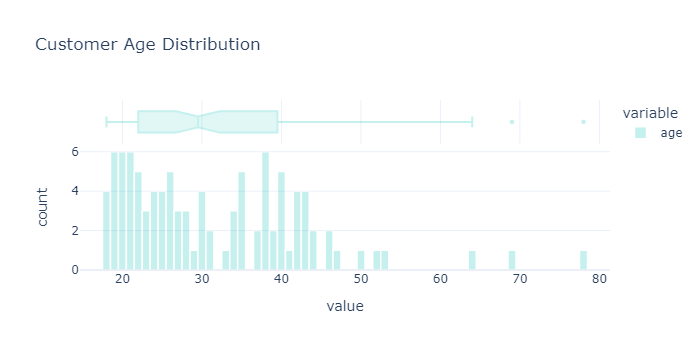

In [15]:
ldf = df.groupby('customer_id')['age'].mean()
ldf = ldf.to_frame()

plot_hist(ldf,'age','Customer Age Distribution')

### **FIRST NAME** ###

Next I'll look at the names of the customers, top 10 most popular and all unique names

In [16]:
# Groupby & first uique & v_counts
# Find the unique subset value counts

def plot_vcounts_groupby(ldf, gr_feature, feature, top=10, return_id=True, orient='x', title=None, height=500):
    
    value_counts_s = ldf.groupby([gr_feature]).first()[feature].value_counts()
    value_counts_f = value_counts_s.to_frame()
    
    if(top):
        value_counts = value_counts_f[:top]
    else:
        value_counts = value_counts_f
    
    if(orient is 'h'):
        fig = px.bar(value_counts, orientation='h',
                    height=height,
                    template='plotly_white')
    elif(orient is 'v'):
        fig = px.bar(value_counts,orientation='v',
                    height=height,
                    template='plotly_white')
    
    fig.update_traces(marker_color='#15C3BA',
                     marker_line_color='white',
                     marker_line_width=1.5,
                     opacity=1.0)
    fig.update_traces(marker_color='#15C3BA',
                     marker_line_color='white',
                     marker_line_width=1.5,
                     opacity=0.25)
    
    fig.show('svg', dpi=300, width=800)
    
    if(return_id):
        return value_counts_f
    
    

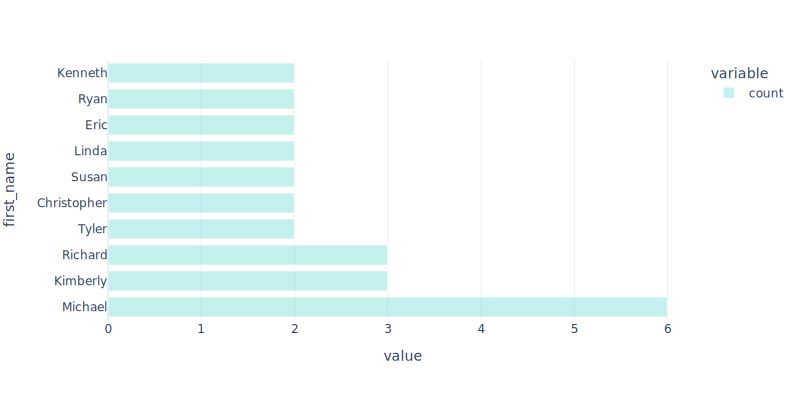

In [17]:
vc = plot_vcounts_groupby(df, 'customer_id' , 'first_name', orient='h', top=10, title='title', height=400)

### **GENDER** ###

Next I'll look into the distribution of males to females

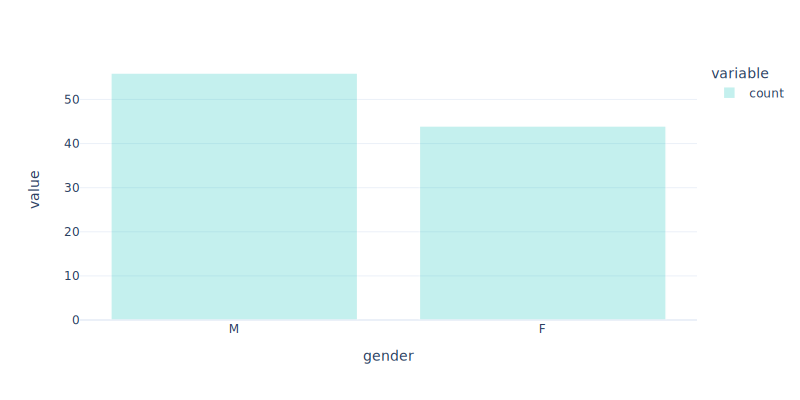

In [18]:
plot_vcounts_groupby(df, 'customer_id', 'gender', orient='v', title='title', height=400, return_id=False)

**INSIGHTS**

~A large portion of customer demographic is in the age group (19-21) years old

~Only a handful of customers are of age 50+ years old (three outliers 64, 69 & 78) years old

~Michael, Kimberley and Richard are the most commond first names of Customers

~There are a little more male customers than females (56 to 44)

### **CUSTOMER ID RELATION TO ACCOUNT ID** ###

In theory, a customer can have multiple accounts, so here I'll look into this

In [19]:
find_id = 0
for i in dict(tuple(df.groupby(['customer_id']))):
    n = dict(tuple(df.groupby(['customer_id'])))[i]['account'].value_counts().shape[0]
    if(n>1):
        find_id=1
        
if(find_id == 1):
    print('customer_id with multiple accounts found')
else:
    print('all customer_id have unique account')

all customer_id have unique account


All customers have one unique account ID

### **CUSTOMER AND MERCHANT LOCATION** ###

#### **UNIQUE MERCHANT STATE ALLOCATIONS** ####

Most of the customers have made purchases using merchants located in at least one state

   ~this simply means that purchases have been assigned merchants located in multiple states

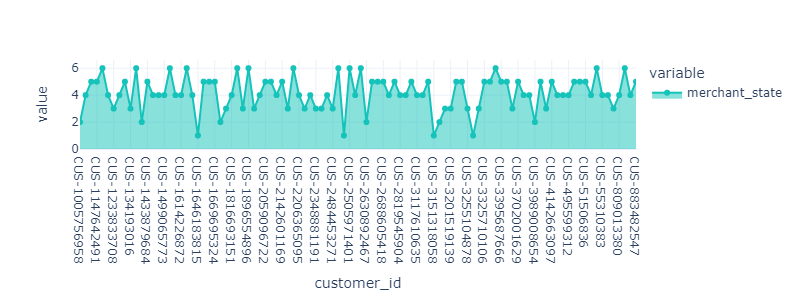

In [20]:
purchase_states = df.groupby(by=['customer_id','merchant_state'])['amount'].sum().reset_index().groupby('customer_id')['merchant_state'].count()
fig = px.area(purchase_states,
             markers=True,
             template='plotly_white',
             color_discrete_sequence=['#15C3BA'])
fig.show('png', dpi=300, width=800, height=300)

#### **PURCHASE LOCATION** ####

~Lets check how many transactions have the same purchase and merchant location

In [21]:
ldf = df_deb[['customer_id','longitude','latitude','merchant_longitude','merchant_latitude']]
ldf['purchase'] = (ldf['longitude']**2 + ldf['latitude']**2)**0.5
ldf['merchant'] = (ldf['merchant_longitude']**2 + ldf['merchant_latitude']**2)**0.5
ldf['same'] = ldf['purchase'] == ldf['merchant']
print(ldf['same'].value_counts())

customer_purchases = dict(tuple(ldf.groupby(by='customer_id')))

same
False    11152
True         8
Name: count, dtype: int64


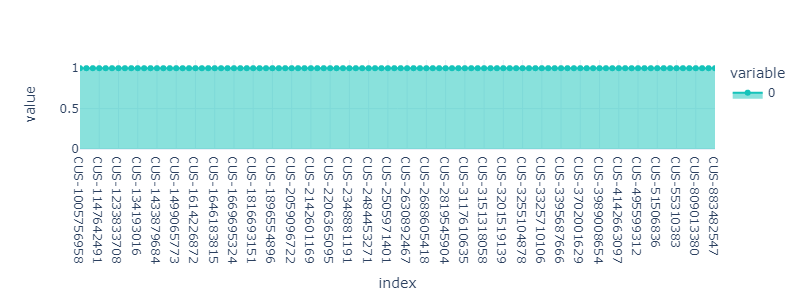

In [22]:
lst = {}

for i,j in customer_purchases.items():
    lst[i]= len(j['purchase'].value_counts())
    
fig = px.area(pd.Series(lst),
             markers=True,
             template='plotly_white',
             color_discrete_sequence=['#15C3BA'])

fig.show('png', dpi=300, width=800, height= 300)
    

~Despite being allocated merchants in different locations, all customers have made purchases in the same state

~Customer puchase locations are not related to merchant locations

## **3. CUSTOMER TRANSACTIONS** ##

Next I'll look into finding insights about customer transactions and the associated features

### **TRANSACTION MOVEMENT** ###

~movement can be divided into two groups, **credit** & **debit** transactions

~**Credit** transactions are associated with **salary payments** as we could notice earlier from value_counts data

~Let's explore **debit** & **credit** transaction data in separate sections

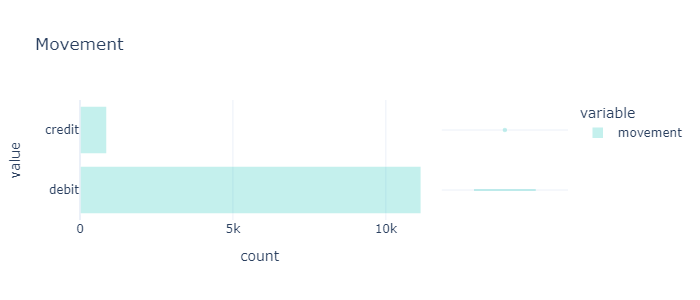

In [23]:
plot_hist(df, 'movement', title='Movement', orient='h', height=300)

### TRANSACTION STATUS ###

~Transaction status can be divided into two groups **authorised & posted**

~**Authorised** by virtue of its name is quite straightforward; a **merchant has also been allocated for the transaction**

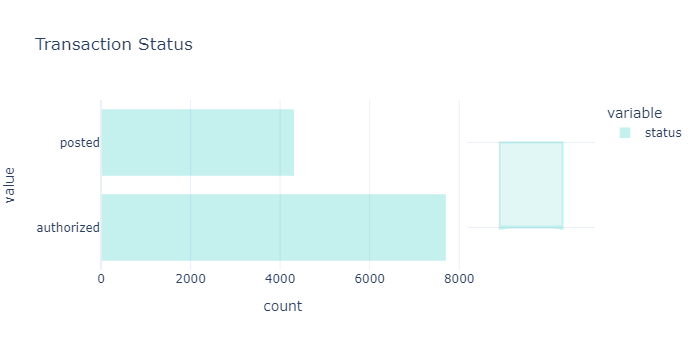

In [24]:
plot_hist(df, 'status', 'Transaction Status', orient='h')

In [25]:
print(f"Number of merchant_id values missing in authorised transactions: {dict(tuple(df.groupby('status')))['authorized']['merchant_id'].isna().sum()}")

Number of merchant_id values missing in authorised transactions: 0


### **TRANSACTION DESCRIPTION** ###

~Rows with posted payments are of type, **PAYMENT**, **PAY/SALARY**, **INTER BANK**, **PHONE BANK**

~We can also clearly see that for these payments a merchant has not been allocated

~Perhaps these payments are **longer to process** compared to typical **EFTPOS** terminals

In [26]:
def plot_vcounts(ldf, feature, title, height=300):
    
    value_counts = ldf[feature].value_counts()
    value_counts = value_counts.to_frame()
    
    fig = px.bar(value_counts, height=height, template='plotly_white')
    fig.update_traces(marker_color='#15C3BA',
                     marker_line_color='white',
                     marker_line_width=1.5,
                     opacity=0.25)
    fig.show('svg', dpi=300)

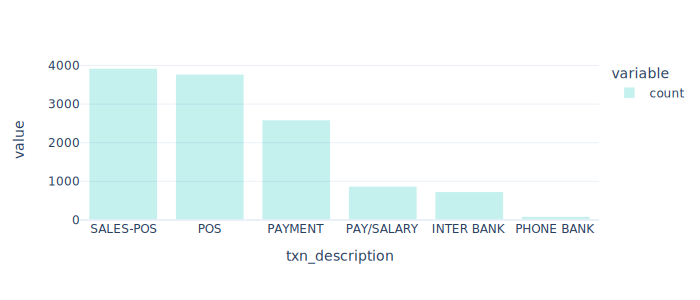

In [27]:
plot_vcounts(df, 'txn_description', 'Transaction Status', height=300)

### PRESENCE OF CARD DURING PAYMENT ###

There is a feature called **card_present_flag** which saw some patterns earlier

There doesn't tend to be any visible variation between (0,1) values, however it does exist for NaN:

~txn_description for both is the same (**POS-PAY,PAY**), status for both is authorised

~txn_description for subset that contains no card present flag (NaN) is of type (**PAYMENT,SALARY,INTERNET,PHONE**)

~merchant_code is missing for both & other merchant features are available for both (0,1)


Some hyptheses about relation of 0/1 labels:

1.Typically EFTPOS readers have a passcode protection for purchases below a certain threshold, below which you don't need to enter your passcode (touch & go)

~However as the histogram below shows, this doesn't tend to be the difference either, as we have amount > 4000 AUD for both flags

2.Another possible variant is more logical, it is associated with the introduction of phone based payment systems (Eg. Apple Pay or QR code based payments etc)

~Such technology is probably more common amongst younger demographic

~Upon finding the mean for each card_present_flag subgroup, it was noted that the mean age is actually almost the same

In [28]:
ldf = df.card_present_flag.value_counts(dropna=False).to_frame()
ldf.style.bar(align='mid', color= ['#15C3BA','#15C3BA'])

,count
card_present_flag,
1.000000,6194
nan,4326
0.000000,1523


In [29]:
print('No Card Present Flag Information Available')
ldf = df.copy()
ldf['card_present_flag'] = df['card_present_flag'].fillna(-1)
display(ldf.groupby('card_present_flag')['txn_description'].value_counts()[-1])
print('')
print('Card Present Flag Activated')
ldf= df.copy()
display(ldf.groupby('card_present_flag')['txn_description'].value_counts()[1])
print('')
print('Card Present Flag Non Activated')
ldf = df.copy()
display(ldf.groupby('card_present_flag')['txn_description'].value_counts()[1])

No Card Present Flag Information Available


txn_description
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64


Card Present Flag Activated


txn_description
SALES-POS    3169
POS          3025
Name: count, dtype: int64


Card Present Flag Non Activated


txn_description
SALES-POS    3169
POS          3025
Name: count, dtype: int64

In [30]:
mdf = dict(tuple(df.groupby('card_present_flag')))
print(mdf.keys())

dict_keys([0.0, 1.0])


In [31]:
pd.set_option('display.max_columns', None)

display(mdf[0.0].head())
mdf[0.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,1,13,Wednesday
21,ACC-2890243754,37,24.77,275.93,0.0,CUS-2695611575,2018-08-01,Joseph,M,-27.93,153.32,7e8bf667-e724-4359-a406-3538a3e27b4e,-28.81,153.28,NSW,Lismore,debit,authorized,1f12467d33ce4609890fb64978ebbcbb,POS,30-40,2018,8,1,8,19,Wednesday
23,ACC-2615038700,43,12.08,30583.15,0.0,CUS-3255104878,2018-08-01,Emily,F,-38.03,145.35,354f40cb-55bc-4a81-a00d-c7faede29f8b,-38.01,145.09,VIC,Mordialloc,debit,authorized,49417bad354f4137971a954c26657e2d,POS,40-50,2018,8,1,8,47,Wednesday
29,ACC-1710017148,19,11.57,1625.34,0.0,CUS-883482547,2018-08-01,Michelle,F,-34.01,150.82,4af25042-a1a4-4688-90b5-240d790e5332,-33.92,151.19,NSW,Alexandria,debit,authorized,82acf03790844776b4587fd6e6f526c5,SALES-POS,<20,2018,8,1,9,11,Wednesday
31,ACC-3485804958,34,33.89,12529.59,0.0,CUS-1196156254,2018-08-01,Jessica,F,-35.01,138.52,a08935a2-99a8-49f0-b73a-f8de51ca0abd,-34.90,138.53,SA,Findon,debit,authorized,89050ee5c5aa4e79b03e717518236bf9,POS,30-40,2018,8,1,9,19,Wednesday


txn_description
SALES-POS    765
POS          758
Name: count, dtype: int64

In [32]:
display(mdf[1.0].head())
mdf[1.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,1,1,Wednesday
2,ACC-1222300524,38,6.42,5.71,1.0,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,1,26,Wednesday
3,ACC-1037050564,40,40.90,2117.22,1.0,CUS-1614226872,2018-08-01,Rhonda,F,-27.66,153.10,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS,30-40,2018,8,1,1,38,Wednesday
4,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,1,51,Wednesday
6,ACC-2776252858,43,61.06,1248.36,1.0,CUS-4123612273,2018-08-01,Kristin,F,-37.76,144.95,3aa18033-a0a9-4190-a117-b7caaf4d07e3,-37.53,144.95,VIC,Kalkallo,debit,authorized,b79ca208099c4c28aa5dae966096d842,SALES-POS,40-50,2018,8,1,2,23,Wednesday


txn_description
SALES-POS    3169
POS          3025
Name: count, dtype: int64

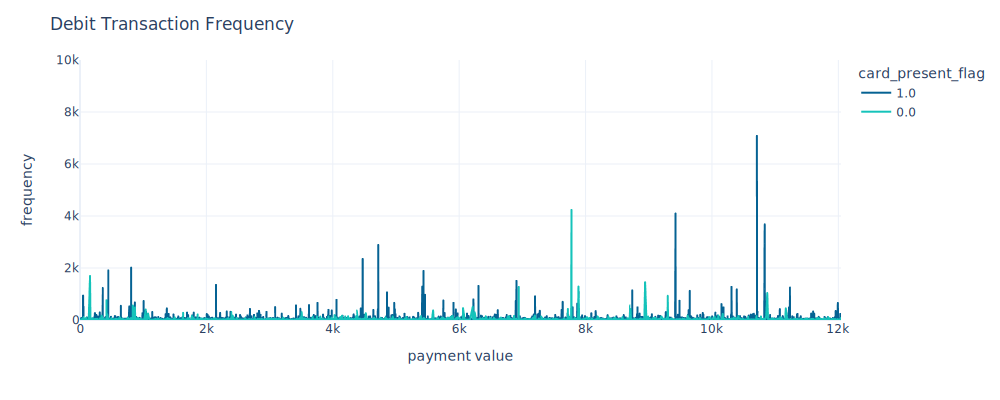

In [33]:
fig = px.line(df_deb, y='amount', color='card_present_flag', height=400, color_discrete_sequence=['#056293','#15C3BA'])

fig.update_yaxes(range=[0,10000])
fig.update_layout(template='plotly_white', title='Debit Transaction Frequency')
fig.update_xaxes(title_text='payment value')
fig.update_yaxes(title_text='frequency')
fig.show('svg', dpi=300, width=1000)

Let's find the mean age for transactions with different subgroups of **card_present_flag**

In [34]:
print('mean age group between 0/1')
mdf=df.groupby('card_present_flag')['age'].mean().to_frame()

mdf.style.bar(align='mid', color=['#056293','#15C3BA'])

mean age group between 0/1


,age
card_present_flag,
0.000000,30.212081
1.000000,30.012754


## 4. CREDIT TRANSACTIONS ##

### **QUARTERLY PAYMENTS** ###

In [35]:
income_by_cus = df[df['movement'] == 'credit'] \
                  .groupby('customer_id')['amount'] \
                  .sum()/3

income_by_cus.describe()

count      100.000000
mean      5588.589500
std       2247.181239
min       2385.320000
25%       3863.777500
50%       4937.828333
75%       7110.838333
max      11781.306667
Name: amount, dtype: float64

There is an average monthly salary of 5588 AUD

The smallest average monthly salary was 2385 AUD

The highest average monthly salary was 117981 AUD

### **3.2 CUSTOMER SEGMENTATION BY QUARTERLY INCOME** ###

~In this section I'll create three different groups of customers: **Low earning customers**,**Middle earning customers** & **High earning customers**

~ Plot the payment amount for high income & low income customers

In [36]:
print(len(income_by_cus.to_frame()[income_by_cus.to_frame()['amount']<5588]), 'customers earn below the mean value')

61 customers earn below the mean value


In [37]:
# top 30 and last 30 by monthly income average of customers
ldf = income_by_cus.sort_values(ascending=False)
ldf_max = ldf.to_frame()[:30]
ldf_min = ldf.to_frame()[-30:]
ldf_mid = ldf.to_frame()[30:70]

highest_earners = list(ldf_max.index)
middle_earners = list(ldf_mid.index)
low_earners = list(ldf_min.index)

def plist(lst,name):

    cols = 4
    # Figure out how many rows are needed
    rows, extra = divmod(len(lst), cols)
    if extra > 0:
        # That means we need one final partial row
        rows += 1

    print(name)
        
    # And show each row in turn
    for row in range(rows):
        line = ""
        for col in range(cols):
            i = col * rows + row
            if i < len(lst):
                line += f"{i:3d} {lst[i]:^14}  "
        print(line)
        
    print('\n')
    
plist(highest_earners,'Highest Earners')
plist(middle_earners,'Middle Earners')
plist(low_earners,'Low Earners')

Highest Earners
  0 CUS-1816693151    8 CUS-883482547    16 CUS-3249305314   24 CUS-1790886359  
  1 CUS-3142625864    9 CUS-1462656821   17 CUS-2663907001   25  CUS-55310383   
  2 CUS-2738291516   10 CUS-1196156254   18 CUS-1617121891   26 CUS-2059096722  
  3 CUS-2155701614   11 CUS-134833760    19 CUS-2500783281   27 CUS-3026014945  
  4 CUS-261674136    12 CUS-2376382098   20 CUS-2819545904   28 CUS-164374203   
  5 CUS-2031327464   13 CUS-2505971401   21 CUS-1147642491   29 CUS-3462882033  
  6 CUS-527400765    14 CUS-1117979751   22 CUS-3174332735  
  7 CUS-3336454548   15 CUS-4142663097   23 CUS-1478398256  


Middle Earners
  0 CUS-495599312    10 CUS-3117610635   20 CUS-127297539    30 CUS-2283904812  
  1 CUS-2317998716   11 CUS-1271030853   21 CUS-1388323263   31 CUS-2370108457  
  2 CUS-3180318393   12 CUS-325142416    22 CUS-3325710106   32 CUS-2142601169  
  3 CUS-537508723    13 CUS-3989008654   23 CUS-2487424745   33 CUS-3129499595  
  4 CUS-4023861240   14 CUS-1220154

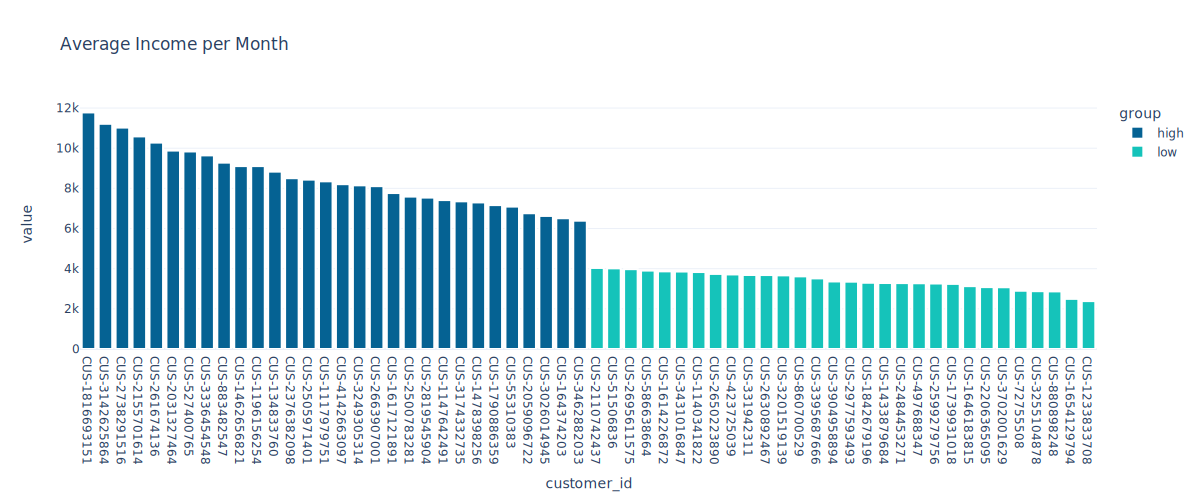

In [38]:
high = ldf_max[['amount']].round(0)
low = ldf_min[['amount']].round(0)
high['group'] = 'high'
low['group'] = 'low'
all_seg = pd.concat([high,low],axis=0)

fig = px.bar(data_frame=all_seg,color='group',
             template='plotly_white',
             color_discrete_sequence=['#056293','#15C3BA'],
             width=1200,orientation='v',
             title='Average Income per Month')

fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(textposition='outside', textfont_size=14)
fig.show('svg',dpi=300)

It can be noted that 61/100 customers earn less than the average income salary amount of 5588 AUD

## **5. DEBIT TRANSACTIONS** ##

### **CUSTOMER PURCHASES DATASET** ###

In this section I will focus on transactions made by customers debit transactions:

~ Debit transactions (ie. those classified as payments) we have 11160 transactions

~All procurement associated transaction (in shop,online,by phone...) by are of type debit in this dataset

~Extract a subset for all debit related purchases by customers using movement = debit

~Focus on age wise transaction variations:

    ~How much is spent, variation by month, variation by day of the week

    ~Variation by hour of the day

~Total Debit transaction data distribution

~lso focus on gender wise transaction variation

### **PAYMENT SUM BY AGE** ###

**Age** is definitely a factor, which influences customer transactions, let's find some interesting relations in the df_deb (debit subset)

~**Debit payment amounts by age group** tells us which age group spends the most during this period

~**Monthly debit transaction amount per age group** tells us how much each age group spent each month

Let's stack all of the amount data for each bin_age group, to determine their total spending amount for each age category

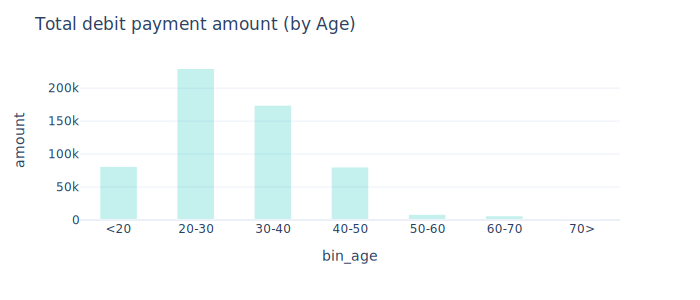

In [39]:
df_deb2 = df_deb.groupby('bin_age')['amount'].sum()
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',
             template='plotly_white',height=300)
fig.update_traces(marker_color='#15C3BA',opacity=1.0,width=0.5)
# fig.update_yaxes(range=[0, 50000])
fig.update_layout(xaxis={'dtick':1},
                  title='Total debit payment amount (by Age)')

fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.update_yaxes(matches=None)
fig.show('svg',dpi=300)

~It's can be seen that 20-30 year old tended to spend the most over the three months, followed by 30-40 year olds

~Older age groups, especially 70> year olds didn't tend to spend much

### **PAYMENT SUM BY AGE & MONTH** ###

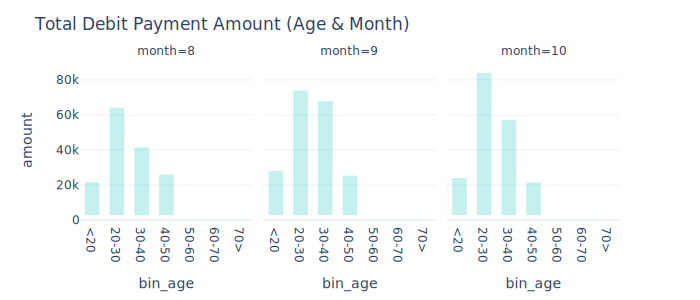

In [40]:
df_deb2 = df_deb.groupby(['month','bin_age'])['amount'].sum()
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',template='plotly_white',
             facet_col='month',facet_col_wrap=3)

fig.update_traces(marker_color='#15C3BA',opacity=1.0,width=1)
fig.update_layout(title='Total Debit Payment Amount (Age & Month)',height=300)
fig.update_traces(marker_line_width = 10,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25,width=1)

fig.show('svg',dpi=300)

Having grouped the **amount** for each of the three months (aug,sept,oct) for each age group

~We can see that the trend doesn't change much over this period

~Except for 30-40 age group in september, which was higher than usual

### **PAYMENT BY AGE & DOW** ###

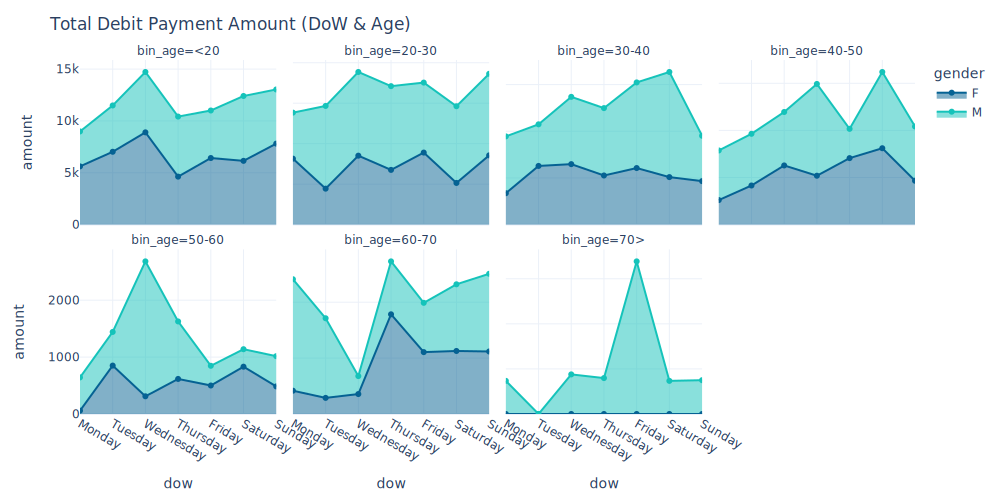

In [41]:
df_deb2 = df_deb.groupby(['dow','bin_age','gender'])['amount'].sum()
df_deb2 = df_deb2.reset_index()

fig = px.area(df_deb2,x='dow',y='amount',
              color='gender',
              template='plotly_white',
              markers=True,
              color_discrete_sequence=['#056293','#15C3BA'],
             facet_col='bin_age',facet_col_wrap=4,height=500,
             category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday'],
                             'bin_age':['<20','20-30','30-40','40-50','50-60',
                                       '60-70','70>']})

fig.update_layout(title='Total Debit Payment Amount (DoW & Age)')
fig.update_yaxes(matches=None)
fig.show('svg',dpi=300,height=500,width=1000)

Having grouped the amount by day of the week for each age group, it can be seen that:

~<20 spend more on wednesdays (14.72k) & least on mondays (8.9k)

~20-30 spend more on wednesdays (37.71k) & least on mondays (26.66k)

~30-40 spend more on saturdays (32.69k) & least on mondays (18.89k)

~40-50 spend more on saturdays (16.2k) & least on mondays (7.8k)

~50-60 spend more on wednesdays (2.68k) & least on mondays (0.64k)

~60-70 spend more on thursdays (1.36k) & least on wednesdays (0.3k)

~70+ spend more on fridays (0.6k) & least on tuesdays (0k)

### **PAYMENT SUM BY AGE & HOUR** ###

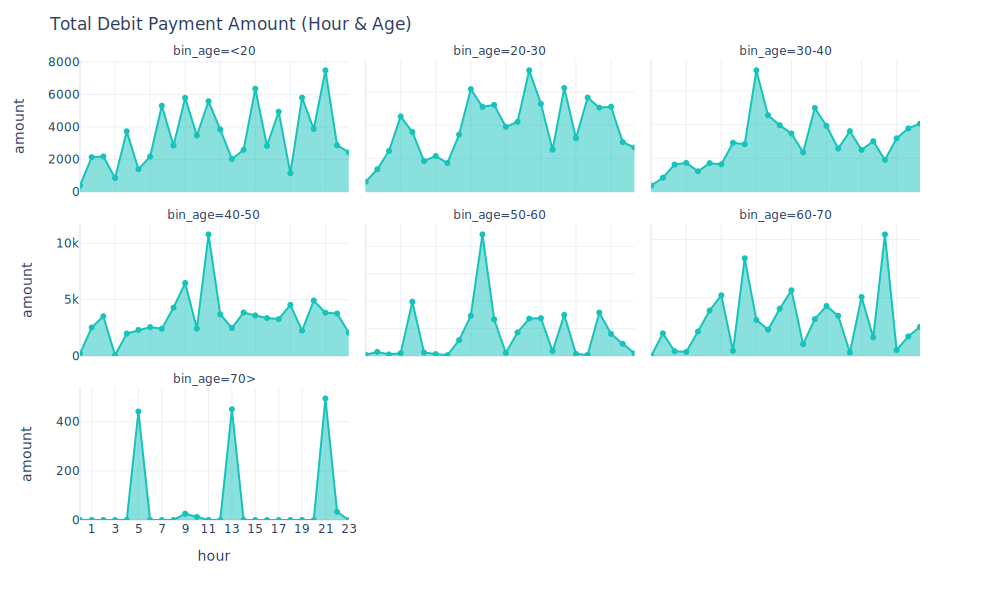

In [42]:
df_deb2 = df_deb.groupby(['hour','bin_age'])['amount'].sum()
df_deb2 = df_deb2.reset_index()
df_deb2

fig = px.area(df_deb2,x='hour',y='amount',
             template='plotly_white',
             facet_col='bin_age',
              markers=True,
             facet_col_wrap=3,
             color_discrete_sequence=['#15C3BA'])

fig.update_traces(marker_color='#15C3BA',opacity=1.0)
fig.update_layout(title='Total Debit Payment Amount (Hour & Age)')
fig.update_xaxes(tickvals = [i for i in range(0,24,3)])
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.update_yaxes(matches=None)

fig.update_traces(marker_line_width = 5,selector=dict(type="marker"))
fig.update_yaxes(matches=None)
fig.show('svg',dpi=500,height=600,width=1000)

### **Overall spending trends:** ###

Having broken down amount by hourly basis for each age group using the plotly animation function, a spending trend with age can be clearly seen.

~For customers <20 the spending amount is not so high compared to 20-30 year old, the tendency of spending then reduces for 30-40 & 40-50 year olds

The highest amount of spending periods:

~<20 spend more at 9 PM (7.4k) & least at 0 AM (386)

~20-30 spend more at 2 PM (18.2k) & least at 0 AM (1.5k)

~30-40 spend more at 9 AM (18.05k) & least at 0 AM (934)

~40-50 spend more at 11 AM (10.8k) & least at 3 AM (67)

~50-60 spend more at 10 AM (2.2k) & least at 0 AM (0)

~60-70 spend more at 8 PM (1k) & least at 0 AM (0)

~70+ spend more at 9 PM (494) & least at 0 AM (0)

### **ACCUMULATIVE SPENDING FOR DIFFERENT DEMOGRAPHIC** ###

**Cumulative debit spending** data allows us to compare total spending of different age groups at different parts of the day

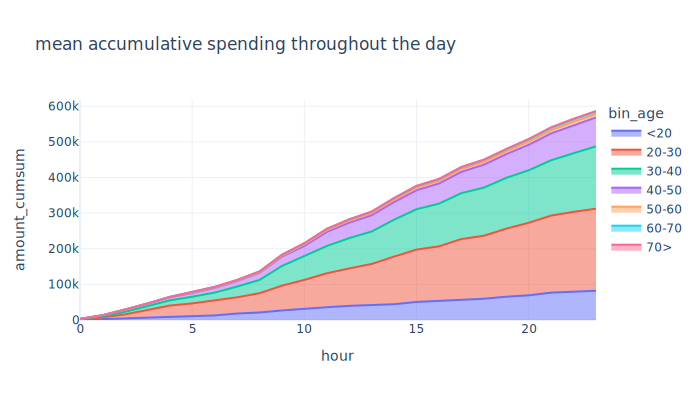

In [43]:
df_deb2_sum = df_deb.groupby(['hour','bin_age'])['amount'].sum() # total age group spending
df_deb2_sum = df_deb2_sum.reset_index()
df_deb2_sum = df_deb2_sum.join(df_deb2_sum.groupby('bin_age').cumsum(),rsuffix="_cumsum")

fig = px.area(df_deb2_sum,
              x='hour',
              y='amount_cumsum',
              color='bin_age',
              height=400,
        template='plotly_white',title='mean accumulative spending throughout the day')
fig.show('svg',dpi=300)

20-30, 30-40 year old demographic have the highest accumulative speding

### **PAYMENT DISTRIBUTION** ###

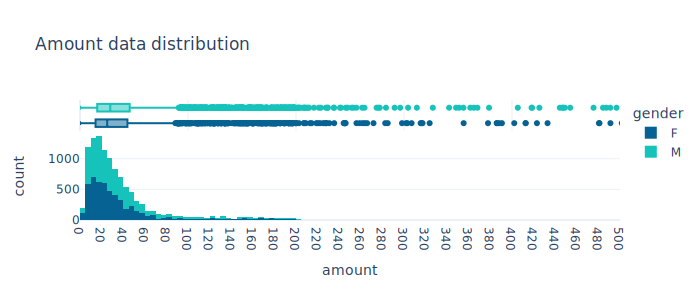

In [44]:
fig = px.histogram(df_deb,x='amount',
                   color='gender',
                   marginal='box',
                   template='plotly_white',
                   title='Amount data distribution',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   nbins=3000,height=300)

fig.update_layout(xaxis={'dtick':20})
fig.update_xaxes(range=[0, 500])
fig.show('svg',dpi=300)

~There is a very one sided/skewed data distribution, outliers starting around 100 AUD

~Customers tended to make lots of small purchases as the distribution suggest 0-20 AUD

### **TRANSACTION FREQENCY & VOLUME BY GENDER & HOUR** ###

#### **TRANSACTION COUNT BY GENDER & HOUR** ####

In [45]:
df2_grp= (df_deb.groupby(by=['hour','month','gender'])['amount']
              .agg(['count','sum'])
              .reset_index())

df2_grp.columns = ['hour', 'month' ,'gender',
                   'Transaction Count', 
                   'Total Transaction Amount']

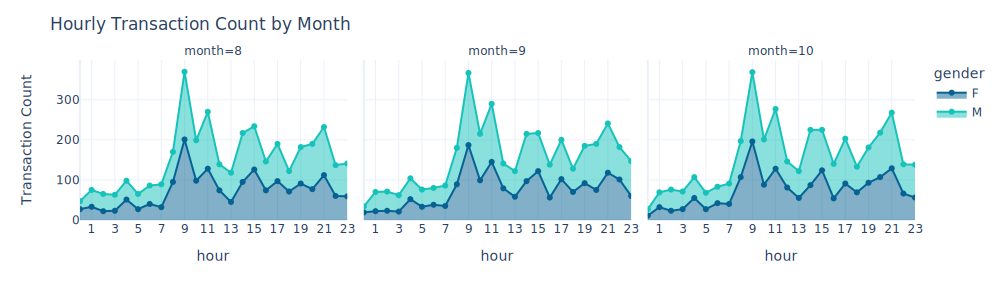

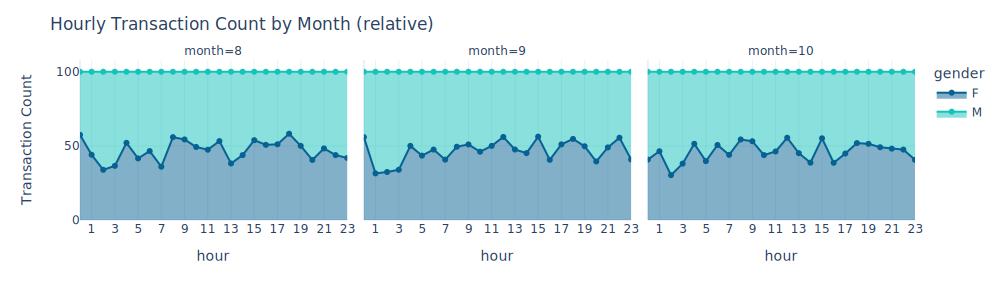

In [46]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            facet_col_wrap = 3,    
            markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            facet_col_wrap = 3,    
            markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month (relative)')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

**INSIGHTS**

~Males tend to be more active at night time (12am - 5am)

~Purchase trends (time of transactions) tend to be very similar from month to month

#### **TRANSACTION VOLUME BY GENDER & HOUR** ####

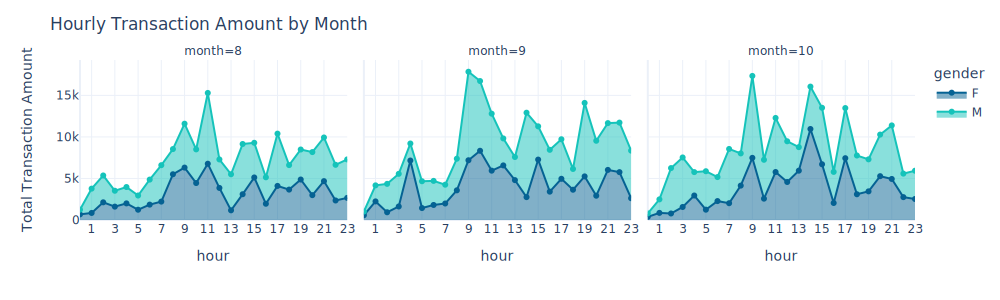

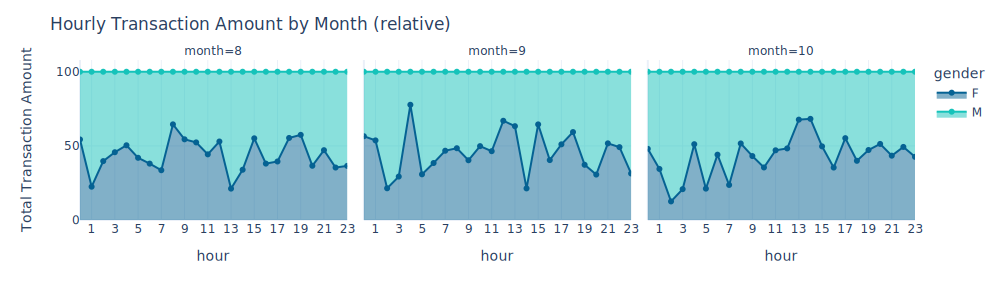

In [47]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            markers=True,
            facet_col_wrap = 3,            
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            markers=True,
            groupnorm='percent',
            facet_col_wrap = 3,            
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month (relative)')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

**INSIGHTS**

~Purchase sums (value of transactions) tend to be quite unstructured from month to month

~Purchases sums at night tended to be quite hight compared to peak purchase times at 9 and 11 am

### **TRANSACTION FREQUENCY & VOLUME BY GENDER & DOW** ###

#### **TRANSACTION COUNT BY GENDER & DOW** ####

Taking into account gender it may be of interest to notice some variation

First I'll group the data & find the total number of transactions made by both genders and groupby by day of the week

In [48]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])['amount']
                      .agg(['count','sum'])
                      .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender']).count()['amount'].reset_index()

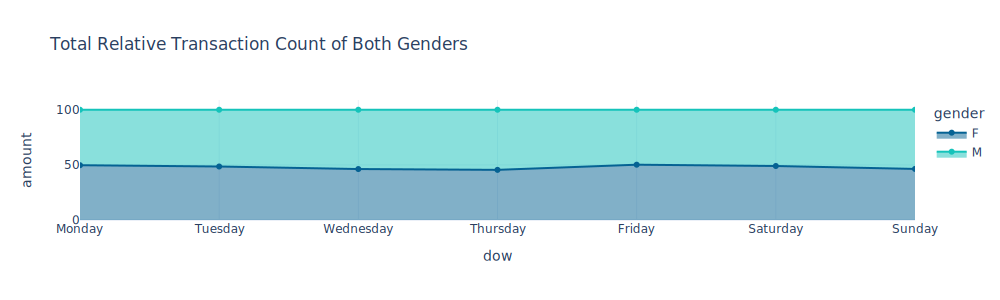

In [49]:
fig = px.area(tdf,x='dow',y='amount',color='gender',
                   markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']},height=300,
             title='Total Relative Transaction Count of Both Genders')
fig.show('svg',dpi=300,width=1000)

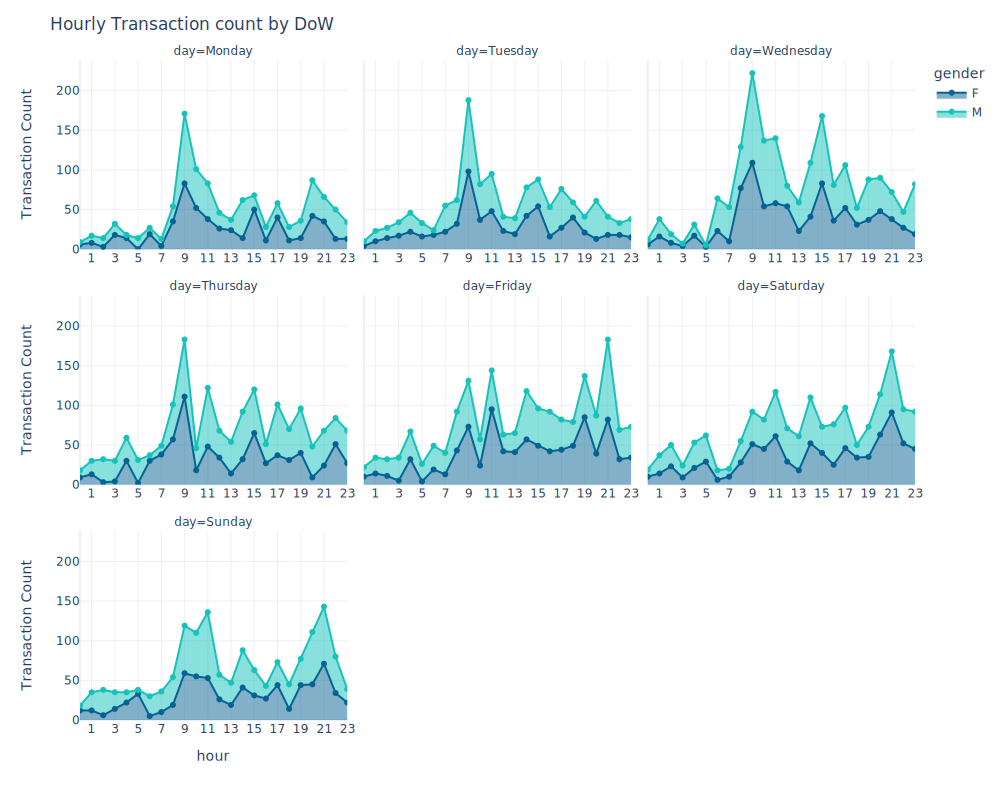

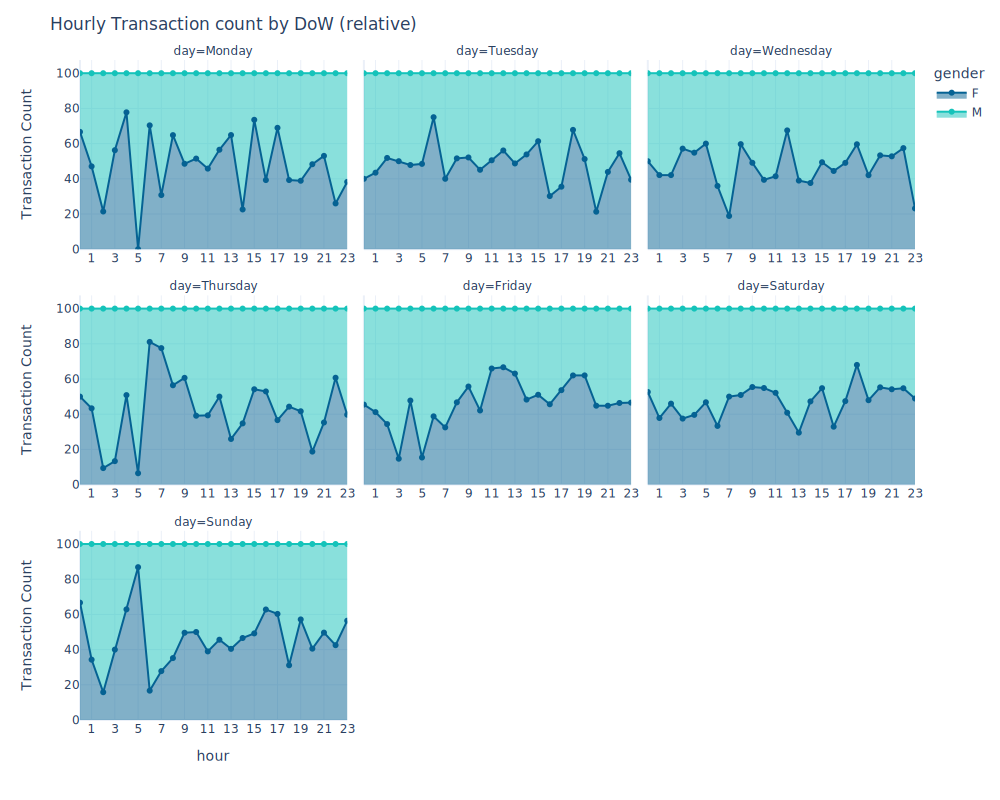

In [50]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,   
            markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction count by DoW')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,   
            markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction count by DoW (relative)')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

**INSIGHTS**

~Males tend to , especially on thursdays and saturdays

~Mondays through to wednesdays tend to have similar purchasing time behaviour

~Purchase trends (time of transactions) tend to be very similar from month to month

In [51]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])['amount']
              .agg(['count','sum'])
              .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender'])['amount'].sum().reset_index()

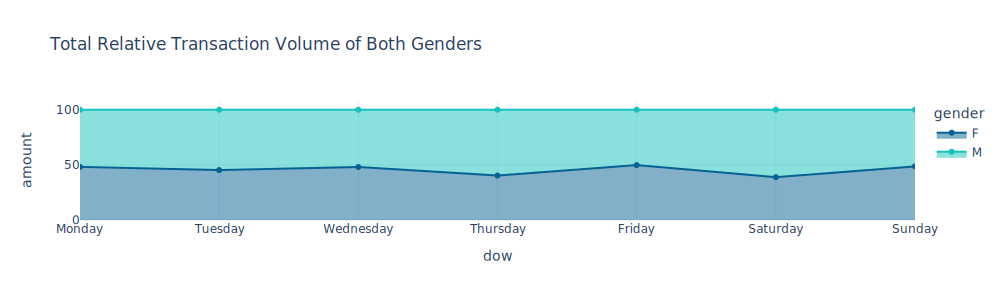

In [52]:
fig = px.area(tdf,x='dow',y='amount',color='gender',
                   markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']},height=300,
              
             title='Total Relative Transaction Volume of Both Genders')
fig.show('svg',dpi=300,width=1000)

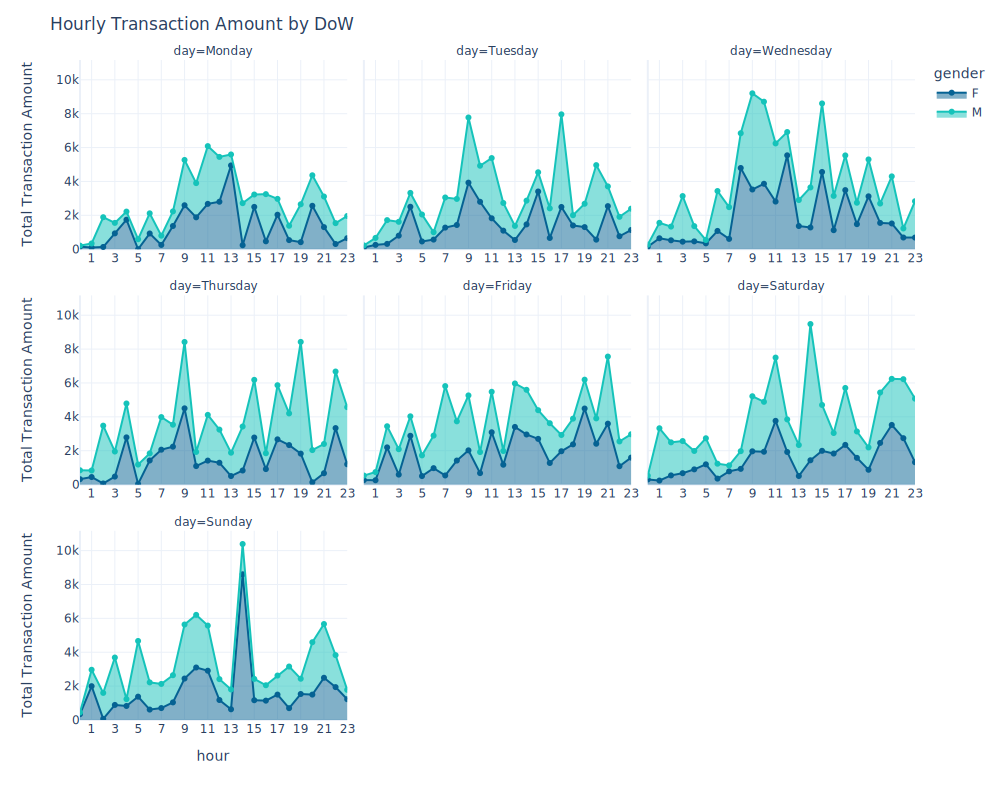

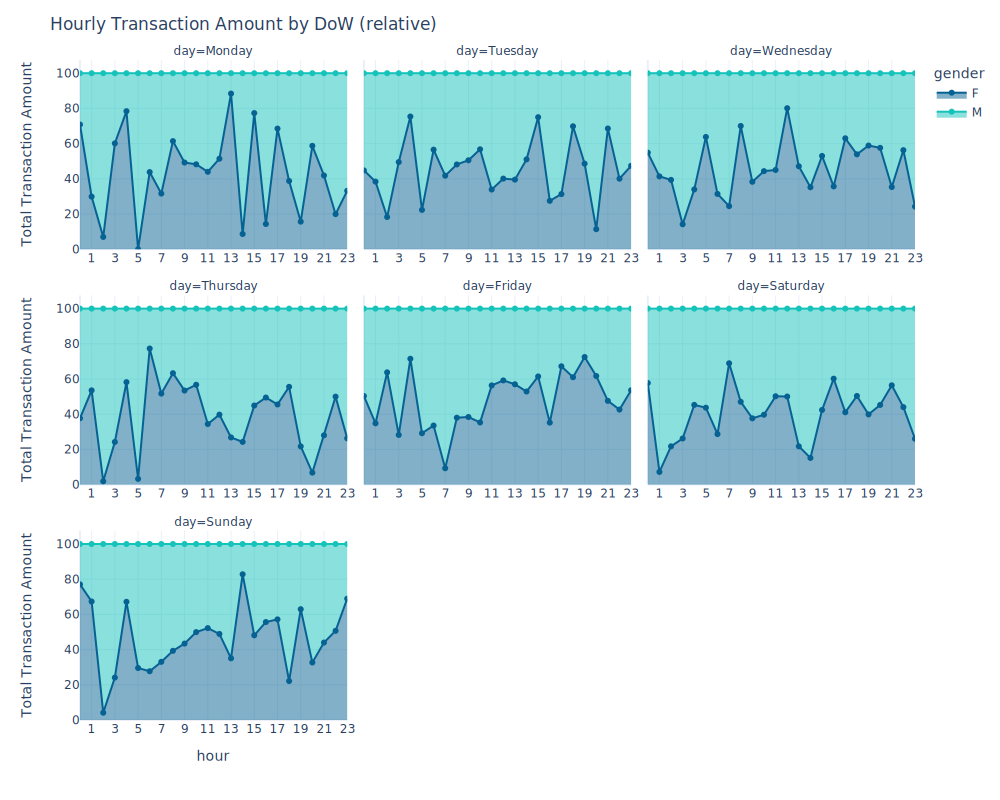

In [53]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,    
             markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Amount by DoW')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,    
             markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Amount by DoW (relative)')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

**INSIGHTS**

~Males spend more than women every single day, especially on thursdays and saturdays

~Mondays through to wednesdays tend to have similar purchasing time behaviour

~Purchase trends (time of transactions) tend to be very similar from month to month

## **6. CUSTOMER ANNUAL SALARY** ##

### **SALARY ESTIMATION** ###

There are a couple of ways to estimate the annual income

    ~Get the total for 3 months & multiply by 4 (less accurate)

    ~Utilise a constant payment period (more accurate)

It's also important to confirm that:

    ~Payments to each customer don't change every payment period

    ~If the payments are not constant, we should find a way to deal with this scenerio

### **FINDING SALARY PAYMENT ABNORMALITIES** ###

~**salary** contains all the work realted transactions made to each customer, from their correponding employer which will be used to calcualte the annual salary for all 100 customers.

Since all customers receive identical payment values over the 3 month period, we can use grouby with nth(-1), when selecting amount

In [54]:
acc_amm = dict(tuple(salary.groupby(['account','amount'])))
combinations = list(acc_amm.keys())
print(f'{len(combinations)} salary payment/account combinations')

100 salary payment/account combinations


### **SALARY PAYMENT PERIODS** ###

Finding Payment Value Abnormalities:

~date or extraction contain time based data, which contains information about the periodicity of payments, from this data we will be able to extract the date when the payment was made

~Let's assume that both date & extraction is made on the same day, no confirmation is made

In [55]:
# Function that will show all transactions made for an account
# I've gone for a more manual approach to checking payment periods 
# as there are not too many customers with irregular payments

def show_account_transactions(account_id):
    return dict(tuple(salary.groupby('account')))[account_id]

# Example, show transactions for account ACC-414431115
show_account_transactions('ACC-414431115')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow
234,ACC-414431115,43,1630.36,1634.77,NaN,CUS-2599279756,2018-08-02,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,4bc4bd009cab4de5b6734e66c9546b7f,PAY/SALARY,40-50,2018,8,2,16,0,Thursday
3734,ACC-414431115,43,1630.36,2907.30,NaN,CUS-2599279756,2018-08-30,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,3008b3e4f7f24c968581f3145a388676,PAY/SALARY,40-50,2018,8,30,16,0,Thursday
5615,ACC-414431115,43,1630.36,4072.78,NaN,CUS-2599279756,2018-09-13,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,80f909564aa3469ebf2e4a31303a3ab8,PAY/SALARY,40-50,2018,9,13,16,0,Thursday
7486,ACC-414431115,43,1630.36,4824.83,NaN,CUS-2599279756,2018-09-27,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,c5c82f9db9e148688cbd086d64bcf5e7,PAY/SALARY,40-50,2018,9,27,16,0,Thursday
9354,ACC-414431115,43,1630.36,6055.88,NaN,CUS-2599279756,2018-10-11,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,355681842092470a8501e35b3fffaf1a,PAY/SALARY,40-50,2018,10,11,16,0,Thursday
11226,ACC-414431115,43,1630.36,6988.64,NaN,CUS-2599279756,2018-10-25,Amy,F,-37.06,142.77,NaN,NaN,NaN,NaN,NaN,credit,posted,a1f2848d6308429c946021b9b6326a2e,PAY/SALARY,40-50,2018,10,25,16,0,Thursday


In [56]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 50 to 12004
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   account             883 non-null    object        
 1   age                 883 non-null    int64         
 2   amount              883 non-null    float64       
 3   balance             883 non-null    float64       
 4   card_present_flag   0 non-null      float64       
 5   customer_id         883 non-null    object        
 6   date                883 non-null    datetime64[ns]
 7   first_name          883 non-null    object        
 8   gender              883 non-null    object        
 9   latitude            883 non-null    float64       
 10  longitude           883 non-null    float64       
 11  merchant_id         0 non-null      object        
 12  merchant_latitude   0 non-null      float64       
 13  merchant_longitude  0 non-null      float64       
 

In [57]:
# get the payment period
salary['date'] = salary['date'].astype('datetime64[ns]')
salary['payment_period'] = salary.groupby('customer_id')['date'].diff(1)
salary['payment_period'] = salary['payment_period'].dropna()  # remove first rows
salary['payment_period'].value_counts()

payment_period
7 days     478
14 days    279
0 days       7
28 days      5
31 days      5
30 days      5
29 days      2
32 days      1
61 days      1
Name: count, dtype: int64

~Using groupby together with diff, the interval between payments can be obtained

~Looking at the data, it can be seen that most of them are done on a weekly (7 days) or fortnight (14 days) basis

~Some have unusual payment dates (28,31,30), some are payed twice in one day (0 days), and a few more as shown below

### **FINDING ABNORMALITY SALARY PAYMENTS** ###

~Payment times for a handful of customers can be investigated & the annual income manually determined

~There aren't too many, so this can be done manually using the show_account_transactions function, or by excluding and grouping accounts which are not 7 or 14 days payment intervals

In [58]:
# change datatype to string from datetime
salary['payment_period_str'] = salary['payment_period'].astype('str')

# groupby customer_id
customer_salary = dict(tuple(salary.groupby('customer_id')))

# Let's find customers with non constant transaction periods of either 7/14 days

lst_abnormal = [] # list of customer_id w/ slightly abnormal (manual calculate needed)
dict_abnormal = {} # dictionary that will contain the abnormal payment groupby data

for id,data in customer_salary.items():

    values_to_remove = ['7 days','14 days','NaT']
    pattern = '|'.join(values_to_remove)

    result = data.loc[~data['payment_period_str'].str.contains(pattern, case=False)]
    if(result.shape[0]>0):
        lst_abnormal.append(id)  # store the key of the abnormal payment account
        dict_abnormal[id] = data # store the abnormal key/value account data

del salary['payment_period_str']

In [59]:
# Customer IDs of abnormal payment cases 
print(dict_abnormal.keys())
print(len(dict_abnormal.keys()))

dict_keys(['CUS-1604596597', 'CUS-1739931018', 'CUS-1816693151', 'CUS-2110742437', 'CUS-2178051368', 'CUS-2283904812', 'CUS-2376382098', 'CUS-2599279756', 'CUS-3462882033', 'CUS-423725039', 'CUS-497688347', 'CUS-51506836', 'CUS-860700529', 'CUS-880898248'])
14


### **STANDARD PAYMENT CASE ANNUAL INCOME** ###

Adding all the customers who have a standard payment schedule (7/14 days)

In [60]:
period_count = (salary[['customer_id','payment_period']]
                .drop_duplicates()
                .groupby(['customer_id'])
                .size()
                .reset_index(name='period count'))
                
period_count[period_count['period count']!=1]

# list of customer ids whose salary are calculated manually (found earlier)
strange_id = ['ACC-1683215619','ACC-1217063613','ACC-1523339231','ACC-354106658',
              'ACC-414431115','ACC-354106658','ACC-414431115','ACC-1056639002','ACC-2153562714',
              'ACC-211792489','ACC-2673069055','ACC-1903037542','ACC-2970114956','ACC-2270192619']
        
# include accounts which have non constant payment period
salary_normal_id = (salary[~salary['account']
                          .isin(strange_id)]
                          .groupby(['account'])
                          .nth(-1)
                          .reset_index())

# Find the annual salary -> amount / payment_period -> daily wage x 365 
salary_normal_id['annual_salary'] = round((salary_normal_id['amount'] / salary_normal_id['payment_period'].dt.days)*365, 3)
salary_normal_id.index = salary_normal_id['account']
del salary_normal_id['account']

# Show DataFrame of normal payment schedule customers
display(salary_normal_id.head())
print(f'Number of standard payment customers: {salary_normal_id.shape}')

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,10264,41,2101.51,8727.47,NaN,CUS-2348881191,2018-10-18,Heather,F,-37.79,144.93,NaN,NaN,NaN,NaN,NaN,credit,posted,5bd791f6625b48858b36e632adc4a22e,PAY/SALARY,40-50,2018,10,18,11,0,Thursday,14 days,54789.368
ACC-2259139624,10267,19,3676.94,20858.72,NaN,CUS-3174332735,2018-10-18,Cindy,F,-37.91,144.66,NaN,NaN,NaN,NaN,NaN,credit,posted,36352d4a7a3644d1b5168d9d37c632f7,PAY/SALARY,<20,2018,10,18,11,0,Thursday,14 days,95863.079
ACC-1279356312,10277,44,2887.34,12625.91,NaN,CUS-1892177589,2018-10-18,Tyler,M,-37.73,144.79,NaN,NaN,NaN,NaN,NaN,credit,posted,a09159eb3acd4663baca1fe789df31f3,PAY/SALARY,40-50,2018,10,18,12,0,Thursday,14 days,75277.079
ACC-1243371644,10284,42,1681.58,6599.68,NaN,CUS-3904958894,2018-10-18,Gregory,M,-33.78,150.90,NaN,NaN,NaN,NaN,NaN,credit,posted,76d2ee9752334f47a12c1ec298921b5b,PAY/SALARY,40-50,2018,10,18,13,0,Thursday,14 days,43841.193
ACC-1608363396,10289,20,2320.30,9739.88,NaN,CUS-2688605418,2018-10-18,Robert,M,-33.87,151.22,NaN,NaN,NaN,NaN,NaN,credit,posted,49bf55fb7e3a4f0aafad245ecc0f34c6,PAY/SALARY,<20,2018,10,18,14,0,Thursday,14 days,60493.536


Number of standard payment customers: (88, 29)


In [61]:
# Check for incorrect values
print(f'inf values: {salary_normal_id.isin([np.inf, -np.inf]).sum().sum()}')
# salary_normal_id.loc[pd.isna(salary_normal_id["annual_salary"]), :].index # find index of nan

inf values: 0


### **ABNORMAL SALARY PAYMENT CASE ANNUAL INCOME** ###

Payment times for a handful of customers can be investigated & the annual income manually determined

In [62]:
# exclude accounts which have non constant payment period
salary_abnormal_id = (salary[salary['account']
                            .isin(strange_id)]
                            .groupby(['account'])
                            .nth(-1)
                            .reset_index())

salary_abnormal_id.index = salary_abnormal_id['account']
del salary_abnormal_id['account']

# manually calculate customer's annual salary
salary_abnormal_id.loc['ACC-1683215619','annual_salary'] = (5000/30)*365
salary_abnormal_id.loc['ACC-1056639002','annual_salary'] = (3195.01/14)*365 - 3195.01/2
salary_abnormal_id.loc['ACC-1217063613','annual_salary'] = (4863.62/30)*365
salary_abnormal_id.loc['ACC-1523339231','annual_salary'] = (8835.98/30)*365 + 8835.98
salary_abnormal_id.loc['ACC-1903037542','annual_salary'] = (1808.62/14)*365 + 1808.62/2
salary_abnormal_id.loc['ACC-211792489','annual_salary'] = (4910.9/60)*365
salary_abnormal_id.loc['ACC-2153562714','annual_salary'] = (3712.56/30)*365
salary_abnormal_id.loc['ACC-2673069055','annual_salary'] = (6024.49/30)*365
salary_abnormal_id.loc['ACC-2970114956','annual_salary'] = (1433.98/14)*365 - 1433.98/2
salary_abnormal_id.loc['ACC-354106658','annual_salary'] = ((5103.51*2)/30)*365 - 5103.51
salary_abnormal_id.loc['ACC-414431115','annual_salary'] = (1630.36/14)*365 - 1433.98
salary_abnormal_id.loc['ACC-2270192619','annual_salary'] = (3026.95/30)*365 + 3026.95

# check for incorrect values
print(f'inf values: {salary_abnormal_id.isin([np.inf, -np.inf]).sum().sum()}')

inf values: 0


In [63]:
df_annual_salary = pd.concat([salary_normal_id,salary_abnormal_id],axis=0)
df_annual_salary.head()

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,10264,41,2101.51,8727.47,NaN,CUS-2348881191,2018-10-18,Heather,F,-37.79,144.93,NaN,NaN,NaN,NaN,NaN,credit,posted,5bd791f6625b48858b36e632adc4a22e,PAY/SALARY,40-50,2018,10,18,11,0,Thursday,14 days,54789.368
ACC-2259139624,10267,19,3676.94,20858.72,NaN,CUS-3174332735,2018-10-18,Cindy,F,-37.91,144.66,NaN,NaN,NaN,NaN,NaN,credit,posted,36352d4a7a3644d1b5168d9d37c632f7,PAY/SALARY,<20,2018,10,18,11,0,Thursday,14 days,95863.079
ACC-1279356312,10277,44,2887.34,12625.91,NaN,CUS-1892177589,2018-10-18,Tyler,M,-37.73,144.79,NaN,NaN,NaN,NaN,NaN,credit,posted,a09159eb3acd4663baca1fe789df31f3,PAY/SALARY,40-50,2018,10,18,12,0,Thursday,14 days,75277.079
ACC-1243371644,10284,42,1681.58,6599.68,NaN,CUS-3904958894,2018-10-18,Gregory,M,-33.78,150.90,NaN,NaN,NaN,NaN,NaN,credit,posted,76d2ee9752334f47a12c1ec298921b5b,PAY/SALARY,40-50,2018,10,18,13,0,Thursday,14 days,43841.193
ACC-1608363396,10289,20,2320.30,9739.88,NaN,CUS-2688605418,2018-10-18,Robert,M,-33.87,151.22,NaN,NaN,NaN,NaN,NaN,credit,posted,49bf55fb7e3a4f0aafad245ecc0f34c6,PAY/SALARY,<20,2018,10,18,14,0,Thursday,14 days,60493.536


In [64]:
df_annual_salary_copy= df_annual_salary.copy()

### **ANNUAL SALARY DISTRIBUTION** ###

Having created the target feature, let's look at the data distribution of annual_salary for the 100 customers

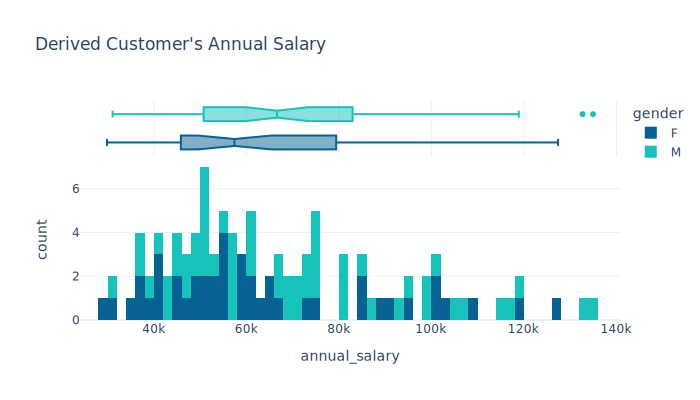

In [65]:
fig = px.histogram(df_annual_salary,
                   x='annual_salary',
                   template='plotly_white',
                   color='gender',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   title='Annual Salary Data Distribution',
                   marginal="box",
                   nbins=100)

# fig.update_traces(marker_color='#15C3BA', 
#                   marker_line_color='white',
#                   marker_line_width=1.5,
#                   opacity=0.25)

fig.update_layout(title="Derived Customer's Annual Salary",height=400)

fig.show('svg',dpi=300)

#### **ANNUAL SALARY STATISTICS** ####

Let's check the statistics for our calculated annual salary column

In [66]:
df_annual_salary['annual_salary'].describe()

count       100.000000
mean      67264.614406
std       25179.797984
min       29874.641667
25%       48056.536107
50%       60163.732000
75%       82336.618500
max      134946.236000
Name: annual_salary, dtype: float64

#### **LINEAR CORRELATION** ####

Let's look at the pearson linear correlation for our newly created target variable labels

Feature Correlation to Target Variable


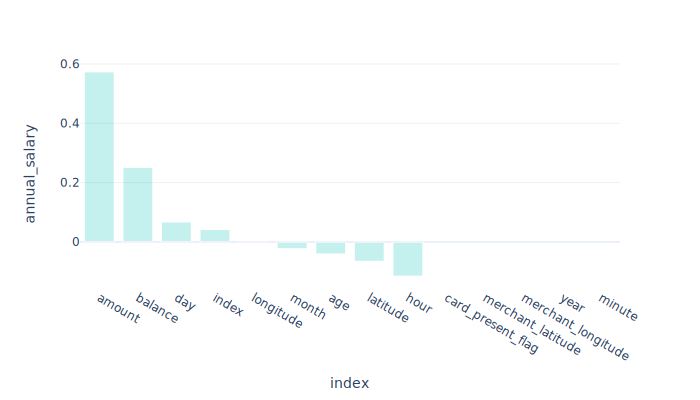

In [67]:
print('Feature Correlation to Target Variable')
corr_target = df_annual_salary.corr(numeric_only=True).loc[:,'annual_salary'].to_frame().sort_values(by='annual_salary',ascending=False).iloc[1:,:]

fig = px.bar(corr_target,y='annual_salary',
             template='plotly_white',height=400)
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.show('svg',dpi=300)

**Key Insights**

~It can be noted that the most common salary is 50-51.99k AUD, the highest being 134-135.99k AUD and the lowest 28-29.99k AUD

~The mean income for males is higher than for women

~The annual salary is mainly correlated to user balance

## **7. MODEL CONSTRUCTION APPROACHES** ##

Having conducted an EDA, it's clear that the dataset contain transactions for both debit (purchases) & credit (salary income)

The credit subset is important as I calculated the annual salary income based on these transaction in section x, now the goal will be to train a model that will be able to predict the annual salary based on a given set of features

I also found that the dataset contains transaction data for 100 customers, which is quite a small number, and the total number of transactions made by these users are around 12000, both of which are quite contrasting numbers



#### **APPROACH 1** ####

Utilise **customer_id** as indicies, which implies that I need to utilise **aggregate functions** in order to generate some features for each client (ie. mean transaction value etc), so our maximum number of rows will be limited by 100 customers. For each row there will be a corresponding **annual_income** value. Simpler models should work on such a dataset better than more complex models.

#### **APPROACH 2** ####

Utilise **transaction** data as it is, ie. the target variable annual_income will be repeated for each **customer_id**, so I will have only 100 unique values, but on the other hand there is a much larger dataset to work with, which should help more advanced models like **decision_tree** gain insights into the data



I'll compare both methods and see which method would work best on this set of data

## **8. ANNUAL SALARY PREDICTION MODEL(AGGREGATE MODEL)** ##

 ### **ASSEMBLING FEATURE MATRIX** ###

**CLEANING**

~Most features in df_annual_salary are related to individual transactions, so let's remove all unnecessary features & start creating our features

~There is three months of data, annual_salary was created from constant monthly payments

**SALARY PAYMENT SIZE**

It's quite rational to assume that upon obtaining new data:

~I'll be able to calcualte monthly income of a customer (if payments vary each time, this can become a bit messy)

~Or utilise a faster method; group all income & caclulate statistics of income payments for each month (mean income, median, standard deviation)

In [68]:
keep_features = ['age','customer_id','first_name','gender','bin_age','payment_period','annual_salary']

df_annual_salary = df_annual_salary[keep_features]
ldf = salary.groupby('account')['amount'].mean().reset_index()
ldf.index = ldf['account']
amount = ldf[['amount']]
df_annual_salary = pd.concat([df_annual_salary,amount],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount
account,,,,,,,,
ACC-3536132544,41,CUS-2348881191,Heather,F,40-50,14 days,54789.368000,2101.51
ACC-2259139624,19,CUS-3174332735,Cindy,F,<20,14 days,95863.079000,3676.94
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58
ACC-1608363396,20,CUS-2688605418,Robert,M,<20,14 days,60493.536000,2320.30
...,...,...,...,...,...,...,...,...
ACC-1903037542,30,CUS-860700529,Jeffrey,M,20-30,14 days,48057.617143,1808.62
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98
ACC-414431115,43,CUS-2599279756,Amy,F,40-50,14 days,41071.834286,1630.36


### **DEBIT TRANSACTION STATISTICS** ###

~Other possible relations to annual_salary are number of purchases, maximum purchase check, mean check & standard deviation (ie. debit transactions statistics)

~I could look at each each month & over a 3 month period as well

~Suffice to say, statistics of debit purchases for each customer is quite straightforward to get, and should always be available

In [69]:
ldf = dict(tuple(df_deb.groupby('month')))

tdf_8 = ldf[8].groupby('account')['amount'].agg(['mean','max','std'])
tdf_9 = ldf[9].groupby('account')['amount'].agg(['mean','max','std'])
tdf_10 = ldf[10].groupby('account')['amount'].agg(['mean','max','std'])

tdf_8.rename({'mean':'deb_mean_8','max':'deb_max_8','std':'deb_std_8'},axis=1,inplace=True)
tdf_9.rename({'mean':'deb_mean_9','max':'deb_max_9','std':'deb_std_9'},axis=1,inplace=True)
tdf_10.rename({'mean':'deb_mean_10','max':'deb_max_10','std':'deb_std_10'},axis=1,inplace=True)

tdf = pd.concat([tdf_8,tdf_9,tdf_10],axis=1)
df_annual_salary = pd.concat([df_annual_salary,tdf],axis=1)
df_annual_salary

# ldf['acc'] = ['_'.join(map(str, x)) for x in ldf.index] # conbine multindex w/ str-int

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10
account,,,,,,,,,,,,,,,,,
ACC-3536132544,41,CUS-2348881191,Heather,F,40-50,14 days,54789.368000,2101.51,71.048182,1629.00,241.472190,42.241176,228.08,40.099852,42.775135,131.73,30.440074
ACC-2259139624,19,CUS-3174332735,Cindy,F,<20,14 days,95863.079000,3676.94,60.642381,166.57,51.489123,65.824167,165.00,56.154781,68.770833,165.00,55.143158
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716
ACC-1608363396,20,CUS-2688605418,Robert,M,<20,14 days,60493.536000,2320.30,44.603556,283.31,61.566443,55.637805,444.28,78.536962,63.246757,788.00,130.289164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-1903037542,30,CUS-860700529,Jeffrey,M,20-30,14 days,48057.617143,1808.62,38.612353,291.31,65.067823,28.080115,296.51,47.145276,31.864719,378.76,51.267661
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611
ACC-414431115,43,CUS-2599279756,Amy,F,40-50,14 days,41071.834286,1630.36,55.611892,480.51,101.431312,33.870625,189.00,39.477620,39.319697,189.00,46.147483


### **CUSTOMER MONTHLY BALANCE** ###

~Next, I'll assume that there is a correlation between a customer's account balance and their annual_salary

~Their balance is tied to each transaction made, so let's also use statistics & extract the mean, maximumum & minimum for each month

In [70]:
ldf = dict(tuple(df.groupby('month')))

tdf_8 = ldf[8].groupby('account')['balance'].agg(['mean','max','std'])
tdf_9 = ldf[9].groupby('account')['balance'].agg(['mean','max','std'])
tdf_10 = ldf[10].groupby('account')['balance'].agg(['mean','max','std'])

tdf_8.rename({'mean':'balance_mean_8','max':'balance_max_8','std':'balance_std_8'},axis=1,inplace=True)
tdf_9.rename({'mean':'balance_mean_9','max':'balance_max_9','std':'balance_std_9'},axis=1,inplace=True)
tdf_10.rename({'mean':'balance_mean_10','max':'balance_max_10','std':'balance_std_10'},axis=1,inplace=True)

tdf = pd.concat([tdf_8,tdf_9,tdf_10],axis=1)
df_annual_salary = pd.concat([df_annual_salary,tdf],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10,balance_mean_8,balance_max_8,balance_std_8,balance_mean_9,balance_max_9,balance_std_9,balance_mean_10,balance_max_10,balance_std_10
account,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,41,CUS-2348881191,Heather,F,40-50,14 days,54789.368000,2101.51,71.048182,1629.00,241.472190,42.241176,228.08,40.099852,42.775135,131.73,30.440074,2153.205870,3275.64,910.423641,4366.178611,5999.62,1366.886380,7191.434872,8727.47,1129.968007
ACC-2259139624,19,CUS-3174332735,Cindy,F,<20,14 days,95863.079000,3676.94,60.642381,166.57,51.489123,65.824167,165.00,56.154781,68.770833,165.00,55.143158,4924.512609,7736.06,2804.400468,10506.592857,14053.84,2722.038976,18612.620000,20858.72,2575.813562
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517,4356.581429,6082.23,1940.063212,7671.293333,8809.04,1283.937311,10597.479722,12625.91,1153.819381
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716,1257.452143,3001.96,811.697966,4107.230000,5514.14,723.591338,6013.780833,7005.72,592.253704
ACC-1608363396,20,CUS-2688605418,Robert,M,<20,14 days,60493.536000,2320.30,44.603556,283.31,61.566443,55.637805,444.28,78.536962,63.246757,788.00,130.289164,2910.553404,4969.93,1302.533104,5807.966512,7529.70,1141.889576,8588.611795,9739.88,929.303995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-1903037542,30,CUS-860700529,Jeffrey,M,20-30,14 days,48057.617143,1808.62,38.612353,291.31,65.067823,28.080115,296.51,47.145276,31.864719,378.76,51.267661,1463.578868,3362.02,823.760537,3416.491798,4589.35,644.186063,4671.130330,5694.13,597.937329
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611,6307.059375,8039.71,553.798730,8683.385882,10367.22,719.573161,10889.838276,12426.87,729.914479
ACC-414431115,43,CUS-2599279756,Amy,F,40-50,14 days,41071.834286,1630.36,55.611892,480.51,101.431312,33.870625,189.00,39.477620,39.319697,189.00,46.147483,1005.901282,2907.30,761.124168,3489.832400,4824.83,610.440833,5931.880571,6988.64,781.534212


### **MERCHANT SUBURB** ###

Next I'll assume that merchant may play a role in determining the customer's annual_salary as it provides us information about the locality of the neighbourhood

~I'll assume that customers with high annual income will have debit transactions associated with merchants that are located in more prestige regions & visa versa

~There needs to be some form of ranking for each merchant_suburb, so what I'll do is group the data by merchant_suburb & find the total speding ammount at that particular merchant

~Once I have this data, I'll associate each customer with a particular merchant, which they tend to visit most often, this is probably preferred over one-hot-encoding

In [71]:
# mean spending at marchant suburb; mapping dictionary
merchant_mean = df_deb.groupby('merchant_suburb')['amount'].agg(['mean'])
smerchant_mean = merchant_mean['mean']
dict_merchant_mean = smerchant_mean.to_dict()

# Customer's spending at different merchant_suburbs (mean & max)
spending_mean = df_deb.groupby(['account','merchant_suburb'])['amount'].agg('mean')
spending_mean = spending_mean.to_frame()
sortedv = spending_mean.sort_values(['account','amount'],ascending=False)

dict_most_common = {}
most_common = dict(tuple(sortedv.reset_index().groupby('account')))

dict_get = {}
for key,value in most_common.items():
    ldf = value.reset_index()
    mc = ldf.loc[0,'merchant_suburb']
    ci = ldf.loc[0,'account']
    dict_get[f'{ci}'] = mc
             
df_most_common = pd.DataFrame.from_dict(dict_get,orient='index',columns=['most_common_suburb'])

smc = df_most_common['most_common_suburb']
smc = smc.replace(dict_merchant_mean)
smc.name = 'most_common_suburb'
df_annual_salary = pd.concat([df_annual_salary,smc],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10,balance_mean_8,balance_max_8,balance_std_8,balance_mean_9,balance_max_9,balance_std_9,balance_mean_10,balance_max_10,balance_std_10,most_common_suburb
ACC-3536132544,41,CUS-2348881191,Heather,F,40-50,14 days,54789.368000,2101.51,71.048182,1629.00,241.472190,42.241176,228.08,40.099852,42.775135,131.73,30.440074,2153.205870,3275.64,910.423641,4366.178611,5999.62,1366.886380,7191.434872,8727.47,1129.968007,77.474800
ACC-2259139624,19,CUS-3174332735,Cindy,F,<20,14 days,95863.079000,3676.94,60.642381,166.57,51.489123,65.824167,165.00,56.154781,68.770833,165.00,55.143158,4924.512609,7736.06,2804.400468,10506.592857,14053.84,2722.038976,18612.620000,20858.72,2575.813562,58.100000
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517,4356.581429,6082.23,1940.063212,7671.293333,8809.04,1283.937311,10597.479722,12625.91,1153.819381,87.675000
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716,1257.452143,3001.96,811.697966,4107.230000,5514.14,723.591338,6013.780833,7005.72,592.253704,367.622000
ACC-1608363396,20,CUS-2688605418,Robert,M,<20,14 days,60493.536000,2320.30,44.603556,283.31,61.566443,55.637805,444.28,78.536962,63.246757,788.00,130.289164,2910.553404,4969.93,1302.533104,5807.966512,7529.70,1141.889576,8588.611795,9739.88,929.303995,107.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-1903037542,30,CUS-860700529,Jeffrey,M,20-30,14 days,48057.617143,1808.62,38.612353,291.31,65.067823,28.080115,296.51,47.145276,31.864719,378.76,51.267661,1463.578868,3362.02,823.760537,3416.491798,4589.35,644.186063,4671.130330,5694.13,597.937329,206.785000
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611,6307.059375,8039.71,553.798730,8683.385882,10367.22,719.573161,10889.838276,12426.87,729.914479,92.855185
ACC-414431115,43,CUS-2599279756,Amy,F,40-50,14 days,41071.834286,1630.36,55.611892,480.51,101.431312,33.870625,189.00,39.477620,39.319697,189.00,46.147483,1005.901282,2907.30,761.124168,3489.832400,4824.83,610.440833,5931.880571,6988.64,781.534212,93.027639
ACC-1056639002,22,CUS-3462882033,Michael,M,20-30,14 days,81700.970000,3195.01,40.957647,163.00,40.262070,45.907059,405.38,72.553962,56.510833,163.00,49.501301,42697.825833,45948.47,834.644756,47432.572500,50843.14,1690.313770,52888.340714,56525.54,2076.535906,213.705000


### **FEATURE CORRELATION TO TARGET VARIABLE** ###
 
Having created some features, let's take a look at the linear correlation of these features to the target variable

~I can note that the amount has a correlation to the target variable (as expected)

~More surprisingly how high the correlation of standard deviation are to the target variable

~Bank balance & spending statistics, in contrast aren't as correlated, however a tendency still exists (perhaps the first four are too correlated)

~Likewise most_common_suburb, which represents a spending ranking of a particular merchant suburb at which the customer tended to spend the most), it seems like, the correlation suggest the opposite, higher salaries are associated with merchant suburbs of smaller ranking (however, the value is too small in magnitude for the statement to hold)

Feature Correlation to Target Variable


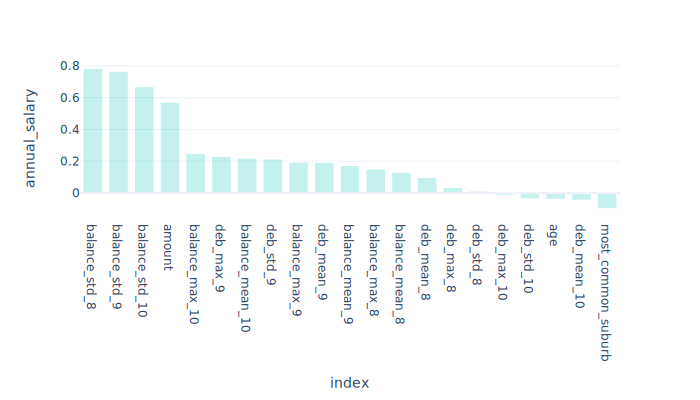

In [72]:
print('Feature Correlation to Target Variable')
corr_target = df_annual_salary.corr(numeric_only=True).loc[:,'annual_salary'].to_frame().sort_values(by='annual_salary',ascending=False).iloc[1:,:]

fig = px.bar(corr_target,y='annual_salary',
             template='plotly_white',height=400)
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.show('svg',dpi=300)

### **LINEAR REGRESSION MODEL** ###

At this stage the model would not be too viable to be rolled out in practice for the reasons given below:

~The LinearRegression model performs quite well, by no means optimal, and can be refined with additional feature creations loops

~I obtained an RMSE of 5821 AUD for the entire data model & using train test splitting, the model was trained on a 70/30 distribution, the unseed test RMSE was 8896 AUD

~As seen in the EDA, there is a lot of missing data for higher age group demographic, I would need more data from this age group in order to understand if I can utlilise such a model in practice

~Another important aspect is the evaluation metric, it probably makes sence to optimise the model using RMSLE as opposed to RMSE, since the error for low income customers is too high

#### **FULL DATASET** ####

~I have a feature matrix to go on, let's see how well the LinearRegression model performs with the created dataset

~First, let's check how well the model works on the entire dataset; I'll train and predict annual_salary for all 100 customers

~For the evaluation metric, let's use RMSE and R2 metric

In [73]:
ann_sal = df_annual_salary.copy()
ann_sal = ann_sal.reset_index()
ann_sal.drop(['index'],axis=1,inplace=True)

y = ann_sal['annual_salary'].copy()
X = ann_sal.drop(['bin_age','annual_salary','payment_period',
                  'customer_id','first_name','gender'],axis=1)


X = X.fillna(X.mode().iloc[0])  # Fill NaN with most common in column
# print(X.isin([np.inf, -np.inf]).sum()) # check inf values

# # Create Linear Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE

# Model on entire datasaet
model_lr = LinearRegression()
model_lr.fit(X,y)
ymodel = model_lr.predict(X)
print('1. Entire Dataset Model')
print(f'RMSE error: {MSE(y,ymodel,squared=False)}')
print(f'R2 error: {model_lr.score(X,y)}')

1. Entire Dataset Model
RMSE error: 5821.86518760469
R2 error: 0.9460011374652079


#### **TRAIN-TEST SPLIT** ####

Having only 100 data points, it is not really feasible to do cross validation, so I'll resort to a standard train-test splitting validation approach

In [74]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

model_lr2 = LinearRegression()
model_lr2.fit(X_train,y_train)
ymodel = model_lr2.predict(X_train)
print('2. Train-test Dataset Model')
print(f'RMSE error (Train): {MSE(y_train,ymodel,squared=False)}')
print(f'R2 error (Train): {model_lr2.score(X_train,y_train)}')
ymodel = model_lr2.predict(X_test)
print(f'RMSE error (Test): {MSE(y_test,ymodel,squared=False)}')
print(f'R2 error (Test): {model_lr2.score(X_test,y_test)}')

2. Train-test Dataset Model
RMSE error (Train): 6070.312156657209
R2 error (Train): 0.9447263742929446
RMSE error (Test): 6277.974379003238
R2 error (Test): 0.9233353248814885


#### **CHECKING LINEAR WEIGHTS** ####

~LinearRegression allows me to check the individual weights of each feature, let's see which features are most important in the linear model

~The feature importance for the test_set model is quite interesting, age although showing very little linear correlation dependency is one of the most influential features

~As expected features with standard deviation statistics are important features in the model, as are debit spending features

~account balance on the other hand has very little influence on the model outcome

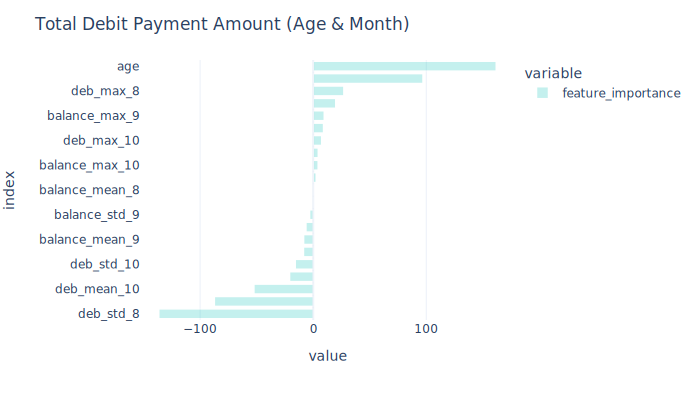

In [75]:
ldf = pd.DataFrame(model_lr2.coef_,index=X.columns)
ldf.columns = ['feature_importance']
fig = px.bar(ldf.sort_values('feature_importance',ascending=True),
             template='plotly_white',orientation='h') 
fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)

fig.update_layout(title='Total Debit Payment Amount (Age & Month)',height=400)

fig.show('svg',dpi=300)

### **DECISION TREE REGRESSION MODEL** ###

The DecisionTreeRegressor takes a little more effort to tune correctly, and performs worse than a simple LinearRegression model (which is not too uncommon)

A possibe reason for this is the feature combination that I selected, by not means are they optimimal, and its likely I can train a better performing model if I create more meaningful features

It is of course desirable to have more customer data available for training, so I can do a thorough cross validation

#### **FULL DATASET** ####

~Decision Tree Models are able to achieve an RMSE error on the entire dataset of zero, given the depth is maximum

~Such models most probably overfit the dataset, and will not likely be able to perform well on new data

In [76]:
from sklearn.tree import DecisionTreeRegressor as DTR

model_dt = DTR()
model_dt.fit(X,y)
ymodel = model_dt.predict(X)
print('1. Entire Dataset Model')
print(f'RMSE error: {MSE(y,ymodel,squared=False)}')
print(f'R2 error: {model_dt.score(X,y)}')

1. Entire Dataset Model
RMSE error: 0.0
R2 error: 1.0


#### **TRAIN-TEST SPLIT** ####

Decision Tree Models are able to achieve an RMSE error on the entire dataset of zero, given the depth is maximum

Such models most probably overfit the dataset, and will not likely be able to perform well on new data

Let's split the dataset into two subsets & try to control the overfitting tendency of the model

Hyperparemeters of DecisionTreeRegressor

~criterion='squared_error', splitter='best', max_depth=None, 

~min_samples_split=2,

~min_samples_leaf=1, min_weight_fraction_leaf=0.0, 

~max_features=None, random_state=None,

~max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

I can control the tendency of the model, by focusing on two parameters max_depth & ccp_alpha

In [77]:
# RMSE min = 6336 

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

lst_vals = [10,8,6,5,4,3,2,1]
dict_mdepth = {'test_vals':[]}
for vals in lst_vals:
    model_dt2 = DTR(max_depth=vals)
    model_dt2.fit(X_train,y_train)
    ymodel = model_dt2.predict(X_test)
    dict_mdepth['test_vals'].append(MSE(y_test,ymodel,squared=False))

In [78]:
dict_mdepth

{'test_vals': [22853.616876418724,
  23561.455205608774,
  22722.964266972136,
  22962.96107812617,
  23241.385153979656,
  22623.530509902364,
  20864.27453149459,
  22191.48921927485]}

Preventing overfitting using post-pruning:

~The Post-pruning technique allows the decision tree model to grow to its full depth

~Tree branches are then removed to prevent the model from overfitting

~Cost complexity pruning (ccp) is one type of post-pruning technique

In [79]:
path = model_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [80]:
ccp_alphas[:15]

array([0.00000000e+00, 2.35012109e-01, 1.21204518e+01, 3.29653566e+02,
       9.07277297e+02, 1.74693194e+03, 2.25163851e+03, 2.58626992e+03,
       3.22176114e+03, 3.65303728e+03, 5.80229901e+03, 6.89252246e+03,
       7.83048309e+03, 8.02668346e+03, 8.33616928e+03])

In [81]:
dict_ccp_alphas = {'test_vals':[]}
for ccp_alpha in ccp_alphas[:15]:
    model_dt2 = DTR(ccp_alpha=ccp_alpha)
    model_dt2.fit(X_train,y_train)
    ymodel = model_dt2.predict(X_test)
    dict_ccp_alphas['test_vals'].append(MSE(y_test,ymodel,squared=False))

In [82]:
print('RMSE w/ ccp_alpha parameter variation')
dict_mdepth

RMSE w/ ccp_alpha parameter variation


{'test_vals': [22853.616876418724,
  23561.455205608774,
  22722.964266972136,
  22962.96107812617,
  23241.385153979656,
  22623.530509902364,
  20864.27453149459,
  22191.48921927485]}

### **CONCLUSION** ###

~The linear model showed the best generalisation performance with an RMSE of 7809 AUD

~Maximum debit purchase size and account balance deviations are important features as found by the linear model

## **9. ANNUAL SALARY PREDICTION MODEL (TRANSACTION MODEL)** ##

In my approach, I will be utilising time series data, however the problem will not be to predict time based predictions, nevertheless the time based features offer some useful insights 

As per EDA, I have quite a bit of missing data, let's do a simple cleanup but imputing them with 'nan' values

In [83]:
import requests

url = 'https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/ANZ_internship/anz_data.csv'

response = requests.get(url)

if response.status_code == 200:
    
    with open('anz_data.csv', 'wb') as file:
        file.write(response.content)
    print('File downloaded and saved as anz_data.csv')
else:
    print(f'Failed to download file. Status code: {response.status_code}')

File downloaded and saved as anz_data.csv


In [84]:
df_anz= pd.read_csv('anz_data.csv')
df_anz['date'] = pd.to_datetime(df_anz['date'])
df_anz['card_present_flag'] = df_anz['card_present_flag'].fillna('none')
df_anz = df_anz.drop(['merchant_code'],axis=1)
df_anz['merchant_id'] = df_anz['merchant_id'].fillna('none')
df_anz['merchant_latitude'] = df_anz['merchant_latitude'].fillna('none')
df_anz['merchant_longitude'] = df_anz['merchant_longitude'].fillna('none')
df_anz['merchant_state'] = df_anz['merchant_state'].fillna('none')
df_anz['merchant_suburb'] = df_anz['merchant_suburb'].fillna('none')
df_anz.drop(['transaction_id'],axis=1,inplace=True)
df_anz

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.650000
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.650000
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.650000
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,f2ef6270-cf91-409f-a6a2-fbd6735ea500,-28.63,153.6,NSW,Byron Bay,debit,authorized,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.650000
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,-28.01,153.41,QLD,Bundall,debit,authorized,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,none,CUS-423725039,2018-10-24,Linda,F,-31.88,116.00,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30 days,45169.480000
12039,ACC-1217063613,27,4863.62,4863.86,none,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,147.61,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30 days,59174.043333
12040,ACC-1217063613,27,4863.62,8905.77,none,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,147.61,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30 days,59174.043333
12041,ACC-3100725361,25,6107.23,6111.57,none,CUS-2178051368,2018-09-26,Ronald,M,-17.03,145.73,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30 days,74304.632000


### **PIPELINE FUNCTIONS** ###

sklearn pipelines are a convenient way to keep code clean, let's write a few functions we'll use in the pipeline

~extractSubset will be used to extract the debit transactions only

~mStandardScaler will be used to scale all numeric features except for categorical and target variable

~selectDtype will be used to select column of particular type

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

class selectDtype(BaseEstimator,TransformerMixin):
    
    def __init__(self,subset='numeric'):
        self.subset = subset
        
    def split_types(self,X,y=None):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  
        numeric = X.select_dtypes(include=numerics)
        categorical = X.select_dtypes(exclude=numerics)
        if(self.subset == 'numeric'):
            return numeric
        else:
            return categoric
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return self.split_types(X)

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin
from copy import deepcopy

class extractSubset(BaseEstimator,TransformerMixin):
    
    def __init__(self,column,subset):
        self.column = column
        self.subset = subset
    
    def extract_data(self,X):
        return deepcopy(X[X[self.column]==self.subset])
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return self.extract_data(X)

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

class mStandardScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self,target):
        self.scaler = StandardScaler()
        self.target = target
        
    def split_types(self,X):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  
        numeric = X.select_dtypes(include=numerics)
        categorical = X.select_dtypes(exclude=numerics)
        return list(numeric.columns),list(categorical.columns)
    
    def fit(self, X, y=None):
        
        num,cat = self.split_types(X)
        if(self.target in num):
            num.remove(self.target)
            
        self.scaler.fit(X[num])
        X_sca = self.scaler.transform(X[num])
        self.X = pd.concat([X_sca,X[cat]],axis=1)
        self.X[self.target] = X[self.target]
        return self

    def transform(self, X, y=None):
        return self.X

### **EVALUATION PIPELINE** ###

Now to the pipeline, for this problem I'll be utilising train/test splitting as per the section above

~I'll pass the dataframe containing all the data I need to build a model df_anz into the pipeline function pipeline_tts

~Then select the appropriate model I'll use to evaluate the generalisation performance using model_id

#### **TRAIN-TEST SPLIT** ####

Generalisation performance is evaluated on 30% of the dataset (which is around 3000 transactions)

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

def pipeline_tts(df,model_id='lr'):
    
    if(model_id == 'lr'):
        pipe = Pipeline([
                        ('scaler',mStandardScaler('annual_salary')),
                        ('debit',extractSubset('movement','debit')),
                        ('numeric_only',selectDtype('numeric')),
                        ])
        model = LinearRegression()
                             
    elif(model_id == 'dt'):
        pipe = Pipeline([
                        ('debit',extractSubset('movement','debit')),
                        ('numeric_only',selectDtype('numeric')),
                        ])
        model = DecisionTreeRegressor()
        
    # modified feature matrix
    df_mod = pipe.fit_transform(df)
    
    y = df_mod['annual_salary']
    X = df_mod.drop(['annual_salary'],axis=1)
    
    X_train,X_test, y_train, y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state=33)
    
    print(X_train.shape)
    print(X_test.shape)
    
    model.fit(X_train,y_train)
    train_predictions = model.predict(X_train)  
    train_RMSE = mean_squared_error(y_train, train_predictions)**0.5
    print(f'train RMSE: {train_RMSE}')
    
#   Predict output for X_test (unseen data)
    test_predictions = model.predict(X_test)   
    test_RMSE = mean_squared_error(y_test, test_predictions)**0.5
    print(f'test RMSE: {test_RMSE}')


### **LINEAR REGRESSION MODEL** ###

On a larger dataset the model cannot capture the relation between the selected numerical features

In [89]:
pipeline_tts(df_anz,'lr')

(7812, 10)
(3348, 10)
train RMSE: 23069.738584275558
test RMSE: 23110.251012362507


### **DECISION TREE REGRESSION MODEL** ###

The DecisionTree model works quite well right out of the box, showing the smallest RMSE so far, without any feature engineering approaches, which is very promising.

I could have done a little more to obtain more relevant features, however an error of about 2500 AUD is quite good already for the model to be used in production

In [90]:
pipeline_tts(df_anz,'dt')

(7812, 10)
(3348, 10)
train RMSE: 6.29835653505809e-11
test RMSE: 2694.950091826695


### **CONCLUSION** ###

The decision tree model showed the best generalisation performance with an RMSE of 2494 AUD